In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.linear_model import LinearRegression as LR
from scipy.stats import norm
from functools import reduce 
import random
from pandas.plotting import parallel_coordinates as pcp
%matplotlib inline

In [2]:
def get_score(mdl,x,y):
    mdl.fit(x,y)
    return mdl.score(x,y)

In [3]:
def CreateScatter(df1, s1, alpha1, figsize, dpi, xlabel, xlabelsize, xticksize, ylabel, ylabelsize, yticksize,
                  title, titlefontsize, marker, scattercolor, x1=0, y1=0, df2=None, s2=None):
    '''
    Notes:
    -figsize must be in parenthesis. Ex: figsize=(6,6)
    -df1 should be points you don't want to stick out
    -df2 should be points you want to stick out
    '''
    plt.figure(figsize=figsize, dpi=dpi)
    
    # scatterplots from dataframe 1
    plt.scatter(x=df1.iloc[:,[0]],y=df1.iloc[:,[1]], 
            marker=marker, s=s1, alpha=alpha1, color=scattercolor)
    
    
    # scatterplots from dataframe 2
    if df2 is not None:
        plt.scatter(x=df2.iloc[:,[0]],y=df2.iloc[:,[1]], 
                marker=marker, s=s2, color=scattercolor, edgecolor='black')
    

    plt.xlabel(xlabel=xlabel, fontsize=xlabelsize)
    plt.ylabel(ylabel=ylabel, fontsize=ylabelsize)
    plt.title(label=title, fontsize=titlefontsize, horizontalalignment='center', weight='bold')
    
    
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize)
    plt.grid(axis='both', ls='--', color='black', alpha=.25)
    plt.box()
    
    

In [4]:
def CreateDoubleBarH(df, figsize, title, titlefontsize, xticksize, yticksize, ytickrotate, 
               upperbarshiftup, lowerbarshiftdown, shiftupperbarleft, shiftlowerbarleft, textbarfontsize,
               textbarcolor, legend_labels, legend_order, legend_pos, legend_size, width=.7, color=None,):
    
    '''
    Notes:
    -futhermost column to the right is the upper bar, lower ones are to the left
    -figsize should be expressed in parenthesis. Ex: figsize = (6,6)
    -color should be expressed in brackets. Ex: color = ['black', 'red']
    -legend labels should be expressed in brackets. Ex: legend_labels = ["what", "is"]
    -legend position should be expressed in brackets. Ex: legend_pos = [.75, .6]
    -legend order should be expressed in brackets. Ex: legend_order = [1,0]
    '''
    
    df[::-1].plot.barh(figsize=figsize, width=width, color=color)

    plt.title(label=title, fontsize=titlefontsize, weight='bold', horizontalalignment='center')
    
    # text for upper bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,1]-shiftupperbarleft,
                i+upperbarshiftup,
                round(df[::-1].iloc[i,1],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for lower bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,0]-shiftlowerbarleft,
                i-lowerbarshiftdown,
                round(df[::-1].iloc[i,0],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
        
    plt.ylabel('')
    
    plt.box()
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize, rotation=ytickrotate)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = legend_labels

    order = legend_order

    plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=legend_pos,
               prop={'size': legend_size})

In [5]:
def CreateTripleBarH(df, figsize, title, titlefontsize, xticksize, yticksize, ytickrotate, 
               upperbarshiftup, middlebarshiftup, lowerbarshiftdown, shiftupperbarleft, shiftlowerbarleft, 
                shiftmiddlebarleft, textbarfontsize,
               textbarcolor, legend_labels, legend_order, legend_pos, legend_size, width=.7, color=None,):
    
    '''
    Notes:
    -futhermost column to the right is the upper bar, lower ones are to the left
    -figsize should be expressed in parenthesis. Ex: figsize = (6,6)
    -color should be expressed in brackets. Ex: color = ['black', 'red']
    -legend labels should be expressed in brackets. Ex: legend_labels = ["what", "is"]
    -legend position should be expressed in brackets. Ex: legend_pos = [.75, .6]
    -legend order should be expressed in brackets. Ex: legend_order = [1,0]
    '''
    
    df[::-1].plot.barh(figsize=figsize, width=width, color=color)

    plt.title(label=title, fontsize=titlefontsize, weight='bold', horizontalalignment='center')
    
    # text for upper bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,2]-shiftupperbarleft,
                i+upperbarshiftup,
                round(df[::-1].iloc[i,2],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for middle bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,1]-shiftmiddlebarleft,
                i+middlebarshiftup,
                round(df[::-1].iloc[i,1],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
    
    # text for lower bar
    for i in range(len(df[::-1].index)):
        plt.text(df[::-1].iloc[i,0]-shiftlowerbarleft,
                i-lowerbarshiftdown,
                round(df[::-1].iloc[i,0],3), 
                fontsize=textbarfontsize, color=textbarcolor, horizontalalignment='center', weight='bold')
        
    plt.ylabel('')
    
    plt.box()
    xticks = plt.xticks(fontsize=xticksize)
    yticks = plt.yticks(fontsize=yticksize, rotation=ytickrotate)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = legend_labels

    order = legend_order

    plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=legend_pos,
               prop={'size': legend_size})

# Questions to answer:
### 1) How much has offense changed in the NBA from the last 25 playoffs and what has changed in that time?

### 2) What is the best metric that predicts winning in the NBA during the playoffs?

### 3) What is the relationship between offensive/defensive rating and team quality in the NBA during the playoffs?

### 4) How much has the relationships between offensive/defensive rating and team quality changed throughout the years?

### 5) What is the best metric that predicts offensive rating in the NBA during the playoffs?

In [6]:
df_traditional_playoff21 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2021-22')
df_advanced_playoff21 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2021-22')
df_shooting_playoff21 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2021-22')

df_traditional_playoff21.set_index('TEAM', inplace=True)
df_advanced_playoff21.set_index('TEAM', inplace=True)
df_shooting_playoff21.set_index('TEAM', inplace=True)

playoffteams22 = pd.concat([df_traditional_playoff21, df_advanced_playoff21.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                      df_shooting_playoff21], axis=1)
playoffteams22.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,5,1,4,0.2,51.3,104.1,36.8,83.5,44.0,12.2,...,36.4,3.0,7.2,41.7,4.6,11.6,39.7,6.8,23.4,29.1


In [7]:
df_traditional_playoff20 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2020-21')
df_advanced_playoff20 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2020-21')
df_shooting_playoff20 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2020-21')

df_traditional_playoff20.set_index('TEAM', inplace=True)
df_advanced_playoff20.set_index('TEAM', inplace=True)
df_shooting_playoff20.set_index('TEAM', inplace=True)

playoffteams21 = pd.concat([df_traditional_playoff20, df_advanced_playoff20.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                      df_shooting_playoff20], axis=1)
playoffteams21.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,18,10,8,0.556,49.1,108.8,39.9,88.8,44.9,12.0,...,44.8,1.5,4.1,37.0,2.9,7.3,40.5,8.8,26.7,32.8


In [8]:
df_traditional_playoff19 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2019-20')
df_advanced_playoff19 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2019-20')
df_shooting_playoff19 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2019-20')

df_traditional_playoff19.set_index('TEAM', inplace=True)
df_advanced_playoff19.set_index('TEAM', inplace=True)
df_shooting_playoff19.set_index('TEAM', inplace=True)

playoffteams20 = pd.concat([df_traditional_playoff19, df_advanced_playoff19.drop(['GP', 'W', 'L', 'MIN'], 
                                                                        axis='columns'), 
                      df_shooting_playoff19], axis=1)
playoffteams20.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,17,10,7,0.588,49.9,111.6,39.4,86.7,45.4,12.7,...,44.4,1.3,4.2,30.6,3.4,9.0,37.9,9.0,27.2,33.0


In [9]:
df_traditional_playoff18 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2018-19')
df_advanced_playoff18 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2018-19')
df_shooting_playoff18 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2018-19')

df_traditional_playoff18.set_index('TEAM', inplace=True)
df_advanced_playoff18.set_index('TEAM', inplace=True)
df_shooting_playoff18.set_index('TEAM', inplace=True)

playoffteams19 = pd.concat([df_traditional_playoff18, df_advanced_playoff18.drop(['GP', 'W', 'L', 'MIN'], 
                                                                                    axis='columns'), 
                      df_shooting_playoff18], axis=1)
playoffteams19.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,9,5,4,0.556,47.7,101.4,35.4,83.6,42.4,11.3,...,41.7,1.3,3.4,38.7,3.0,7.4,40.3,8.3,25.2,33.0


In [10]:
df_traditional_playoff17 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2017-18')
df_advanced_playoff17 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2017-18')
df_shooting_playoff17 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2017-18')

df_traditional_playoff17.set_index('TEAM', inplace=True)
df_advanced_playoff17.set_index('TEAM', inplace=True)
df_shooting_playoff17.set_index('TEAM', inplace=True)

playoffteams18 = pd.concat([df_traditional_playoff17, df_advanced_playoff17.drop(['GP', 'W', 'L', 'MIN'], 
                                                                                    axis='columns'), 
                      df_shooting_playoff17], axis=1)
playoffteams18.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,19,11,8,0.579,51.3,107.1,38.5,87.9,43.7,11.1,...,46.0,1.3,3.0,42.1,2.8,6.3,44.2,7.7,24.1,31.9


In [11]:
df_traditional_playoff16 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2016-17')
df_advanced_playoff16 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2016-17')
df_shooting_playoff16 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2016-17')

df_traditional_playoff16.set_index('TEAM', inplace=True)
df_advanced_playoff16.set_index('TEAM', inplace=True)
df_shooting_playoff16.set_index('TEAM', inplace=True)

playoffteams17 = pd.concat([df_traditional_playoff16, df_advanced_playoff16.drop(['GP', 'W', 'L', 'MIN'], 
                                                                                    axis='columns'), 
                      df_shooting_playoff16], axis=1)
playoffteams17.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,6,2,4,0.333,48.8,107.3,38.1,85.9,44.4,8.5,...,46.2,0.5,2.7,18.8,1.5,4.8,31.0,6.8,22.5,30.4


In [12]:
df_traditional_playoff15 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2015-16')
df_advanced_playoff15 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2015-16')
df_shooting_playoff15 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2015-16')

df_traditional_playoff15.set_index('TEAM', inplace=True)
df_advanced_playoff15.set_index('TEAM', inplace=True)
df_shooting_playoff15.set_index('TEAM', inplace=True)

playoffteams16 = pd.concat([df_traditional_playoff15, df_advanced_playoff15.drop(['GP', 'W', 'L', 'MIN'], axis='columns'), 
                      df_shooting_playoff15], axis=1)
playoffteams16.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,10,4,6,0.4,50.0,103.2,37.7,87.4,43.2,10.9,...,27.8,1.2,3.0,40.0,2.2,6.6,33.3,8.4,25.2,33.3


In [13]:
df_traditional_playoff14 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2014-15')
df_advanced_playoff14 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2014-15')
df_shooting_playoff14 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2014-15')

df_traditional_playoff14.set_index('TEAM', inplace=True)
df_advanced_playoff14.set_index('TEAM', inplace=True)
df_shooting_playoff14.set_index('TEAM', inplace=True)

playoffteams15 = pd.concat([df_traditional_playoff14, df_advanced_playoff14.drop(['GP', 'W', 'L', 'MIN'], 
                                                                                    axis='columns'), 
                      df_shooting_playoff14], axis=1)
playoffteams15.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,16,8,8,0.5,51.0,102.8,38.7,89.7,43.1,9.5,...,35.3,1.3,3.4,37.0,2.4,6.6,36.2,6.7,22.0,30.4


In [14]:
df_traditional_playoff13 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2013-14')
df_advanced_playoff13 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2013-14')
df_shooting_playoff13 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2013-14')

df_traditional_playoff13.set_index('TEAM', inplace=True)
df_advanced_playoff13.set_index('TEAM', inplace=True)
df_shooting_playoff13.set_index('TEAM', inplace=True)


playoffteams14 = pd.concat([df_traditional_playoff13, df_advanced_playoff13.drop(['GP', 'W', 'L', 'MIN'], 
                                                                                    axis='columns'), 
                      df_shooting_playoff13], axis=1)
playoffteams14.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,7,3,4,0.429,52.7,101.4,33.2,86.4,38.5,12.4,...,34.8,0.6,2.3,25.0,1.7,5.6,30.8,9.6,27.1,35.3


In [15]:
df_traditional_playoff12 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2012-13')
df_advanced_playoff12 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2012-13')
df_shooting_playoff12 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2012-13')

df_traditional_playoff12.set_index('TEAM', inplace=True)
df_advanced_playoff12.set_index('TEAM', inplace=True)
df_shooting_playoff12.set_index('TEAM', inplace=True)

playoffteams13 = pd.concat([df_traditional_playoff12, df_advanced_playoff12.drop(['GP','W','L', 'MIN'], axis='columns'), df_shooting_playoff12]
                     , axis=1)
playoffteams13.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,6,2,4,0.333,51.7,96.2,35.2,83.3,42.2,6.6,...,27.3,1.0,2.2,46.2,1.5,4.0,37.5,4.7,14.2,32.9


In [16]:
df_traditional_playoff11 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2011-12')
df_advanced_playoff11 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2011-12')
df_shooting_playoff11 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2011-12')

df_traditional_playoff11.set_index('TEAM', inplace=True)
df_advanced_playoff11.set_index('TEAM', inplace=True)
df_shooting_playoff11.set_index('TEAM', inplace=True)

playoffteams12 = pd.concat([df_traditional_playoff11, df_advanced_playoff11.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff11]
                     , axis=1)
playoffteams12.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,6,2,4,0.333,54.3,91.3,35.4,88.1,40.1,6.5,...,40.0,0.8,2.2,38.5,1.8,4.7,39.3,4.0,14.0,28.6


In [17]:
df_traditional_playoff10 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2010-11')
df_advanced_playoff10 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2010-11')
df_shooting_playoff10 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2010-11')

df_traditional_playoff10.set_index('TEAM', inplace=True)
df_advanced_playoff10.set_index('TEAM', inplace=True)
df_shooting_playoff10.set_index('TEAM', inplace=True)

playoffteams11 = pd.concat([df_traditional_playoff10, df_advanced_playoff10.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff10]
                     , axis=1)
playoffteams11.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,12,6,6,0.5,55.8,100.3,38.3,88.2,43.4,5.2,...,21.7,0.5,1.5,33.3,0.9,3.4,26.8,3.6,10.5,34.1


In [18]:
df_traditional_playoff09 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2009-10')
df_advanced_playoff09 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2009-10')
df_shooting_playoff09 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2009-10')

df_traditional_playoff09.set_index('TEAM', inplace=True)
df_advanced_playoff09.set_index('TEAM', inplace=True)
df_shooting_playoff09.set_index('TEAM', inplace=True)

playoffteams10 = pd.concat([df_traditional_playoff09, df_advanced_playoff09.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff09]
                     , axis=1)
playoffteams10.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,11,4,7,0.364,55.5,103.5,39.1,92.1,42.5,5.3,...,25.0,1.0,1.5,64.7,1.7,4.5,38.8,2.8,9.1,31.0


In [19]:
df_traditional_playoff08 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2008-09')
df_advanced_playoff08 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2008-09')
df_shooting_playoff08 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2008-09')

df_traditional_playoff08.set_index('TEAM', inplace=True)
df_advanced_playoff08.set_index('TEAM', inplace=True)
df_shooting_playoff08.set_index('TEAM', inplace=True)

playoffteams09 = pd.concat([df_traditional_playoff08, df_advanced_playoff08.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff08]
                     , axis=1)
playoffteams09.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,11,4,7,0.364,57.5,100.5,36.0,88.1,40.9,7.3,...,25.8,0.6,2.6,24.1,1.4,5.5,25.0,4.6,11.7,39.5


In [20]:
df_traditional_playoff07 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2007-08')
df_advanced_playoff07 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2007-08')
df_shooting_playoff07 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2007-08')

df_traditional_playoff07.set_index('TEAM', inplace=True)
df_advanced_playoff07.set_index('TEAM', inplace=True)
df_shooting_playoff07.set_index('TEAM', inplace=True)

playoffteams08 = pd.concat([df_traditional_playoff07, df_advanced_playoff07.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff07]
                     , axis=1)
playoffteams08.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,7,3,4,0.429,55.2,100.2,33.7,81.9,41.1,4.6,...,37.5,0.5,1.7,30.0,0.9,2.6,33.3,3.1,9.9,31.9


In [21]:
df_traditional_playoff06 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2006-07')
df_advanced_playoff06 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2006-07')
df_shooting_playoff06 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2006-07')

df_traditional_playoff06.set_index('TEAM', inplace=True)
df_advanced_playoff06.set_index('TEAM', inplace=True)
df_shooting_playoff06.set_index('TEAM', inplace=True)

playoffteams07 = pd.concat([df_traditional_playoff06, df_advanced_playoff06.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff06]
                     , axis=1)
playoffteams07.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Chicago Bulls,10,6,4,0.6,53.3,102.6,36.1,83.9,43.0,6.5,...,52.2,0.6,1.9,31.6,1.8,4.2,42.9,4.1,12.3,33.3


In [22]:
df_traditional_playoff05 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2005-06')
df_advanced_playoff05 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2005-06')
df_shooting_playoff05 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2005-06')

df_traditional_playoff05.set_index('TEAM', inplace=True)
df_advanced_playoff05.set_index('TEAM', inplace=True)
df_shooting_playoff05.set_index('TEAM', inplace=True)

playoffteams06 = pd.concat([df_traditional_playoff05, df_advanced_playoff05.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff05]
                     , axis=1)
playoffteams06.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Chicago Bulls,6,2,4,0.333,50.6,103.7,35.9,80.5,44.5,8.3,...,52.9,0.8,2.5,33.3,2.3,5.3,43.8,5.5,14.5,37.9


In [23]:
df_traditional_playoff04 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2004-05')
df_advanced_playoff04 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2004-05')
df_shooting_playoff04 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2004-05')

df_traditional_playoff04.set_index('TEAM', inplace=True)
df_advanced_playoff04.set_index('TEAM', inplace=True)
df_shooting_playoff04.set_index('TEAM', inplace=True)

playoffteams05 = pd.concat([df_traditional_playoff04, df_advanced_playoff04.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff04]
                     , axis=1)
playoffteams05.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,7,3,4,0.429,55.4,99.7,37.3,84.4,44.2,5.5,...,16.7,1.3,2.4,52.9,1.6,4.1,37.9,3.3,10.7,30.7


In [24]:
df_traditional_playoff03 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2003-04')
df_advanced_playoff03 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2003-04')
df_shooting_playoff03 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2003-04')

df_traditional_playoff03.set_index('TEAM', inplace=True)
df_advanced_playoff03.set_index('TEAM', inplace=True)
df_shooting_playoff03.set_index('TEAM', inplace=True)

playoffteams04 = pd.concat([df_traditional_playoff03, df_advanced_playoff03.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff03]
                     , axis=1)
playoffteams04.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,4,0,4,0.0,52.7,92.9,31.6,77.5,40.8,5.8,...,50.0,1.3,2.5,50.0,1.8,3.5,50.0,3.5,12.0,29.2


In [25]:
df_traditional_playoff02 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2002-03')
df_advanced_playoff02 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2002-03')
df_shooting_playoff02 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2002-03')

df_traditional_playoff02.set_index('TEAM', inplace=True)
df_advanced_playoff02.set_index('TEAM', inplace=True)
df_shooting_playoff02.set_index('TEAM', inplace=True)

playoffteams03 = pd.concat([df_traditional_playoff02, df_advanced_playoff02.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff02]
                     , axis=1)
playoffteams03.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,10,4,6,0.4,52.5,100.4,35.5,84.0,42.2,9.1,...,38.2,1.6,3.9,41.0,2.9,7.3,39.7,5.7,16.8,33.9


In [26]:
df_traditional_playoff01 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2001-02')
df_advanced_playoff01 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2001-02')
df_shooting_playoff01 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2001-02')

df_traditional_playoff01.set_index('TEAM', inplace=True)
df_advanced_playoff01.set_index('TEAM', inplace=True)
df_shooting_playoff01.set_index('TEAM', inplace=True)

playoffteams02 = pd.concat([df_traditional_playoff01, df_advanced_playoff01.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff01]
                     , axis=1)
playoffteams02.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,16,9,7,0.563,52.6,99.9,35.9,85.9,41.8,8.6,...,34.1,1.0,3.2,31.3,1.9,5.9,32.6,6.1,17.4,34.9


In [27]:
df_traditional_playoff00 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='2000-01')
df_advanced_playoff00 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 2000-01')
df_shooting_playoff00 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 2000-01')

df_traditional_playoff00.set_index('TEAM', inplace=True)
df_advanced_playoff00.set_index('TEAM', inplace=True)
df_shooting_playoff00.set_index('TEAM', inplace=True)

playoffteams01 = pd.concat([df_traditional_playoff00, df_advanced_playoff00.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff00]
                     , axis=1)
playoffteams01.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Charlotte Hornets,10,6,4,0.6,53.2,106.1,37.6,86.6,43.4,4.9,...,50.0,0.8,1.3,60.0,1.2,2.2,54.5,3.2,9.7,33.0


In [28]:
df_traditional_playoff99 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='1999-00')
df_advanced_playoff99 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 1999-00')
df_shooting_playoff99 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 1999-00')

df_traditional_playoff99.set_index('TEAM', inplace=True)
df_advanced_playoff99.set_index('TEAM', inplace=True)
df_shooting_playoff99.set_index('TEAM', inplace=True)

playoffteams00 = pd.concat([df_traditional_playoff99, df_advanced_playoff99.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff99]
                     , axis=1)
playoffteams00.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Charlotte Hornets,4,1,3,0.25,55.5,102.8,36.3,84.5,43.0,5.1,...,25.0,0.3,1.3,25.0,0.5,2.0,25.0,4.0,13.0,30.8


In [29]:
df_traditional_playoff98 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='1998-99')
df_advanced_playoff98 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 1998-99')
df_shooting_playoff98 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 1998-99')

df_traditional_playoff98.set_index('TEAM', inplace=True)
df_advanced_playoff98.set_index('TEAM', inplace=True)
df_shooting_playoff98.set_index('TEAM', inplace=True)

playoffteams99 = pd.concat([df_traditional_playoff98, df_advanced_playoff98.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff98]
                     , axis=1)
playoffteams99.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,9,3,6,0.333,57.1,94.8,34.0,88.8,38.3,5.7,...,27.3,0.4,0.7,66.7,0.8,1.9,41.2,4.0,13.3,30.0


In [30]:
df_traditional_playoff97 = pd.read_excel('nbaPlayoffs_TraditionalStats.xlsx', sheet_name='1997-98')
df_advanced_playoff97 = pd.read_excel('nbaPlayoffs_AdvancedStats.xlsx', sheet_name='Advanced 1997-98')
df_shooting_playoff97 = pd.read_excel('nbaPlayoffs_ShootingStats.xlsx', sheet_name='Shooting 1997-98')

df_traditional_playoff97.set_index('TEAM', inplace=True)
df_advanced_playoff97.set_index('TEAM', inplace=True)
df_shooting_playoff97.set_index('TEAM', inplace=True)

playoffteams98 = pd.concat([df_traditional_playoff97, df_advanced_playoff97.drop(['GP','W','L', 'MIN'], axis='columns'), 
                               df_shooting_playoff97]
                     , axis=1)
playoffteams98.head(1)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,FG% (Left Corner 3),FGM (Right Corner 3),FGA (Right Corner 3),FG% (Right Corner 3),FGM (Corner 3),FGA (Corner 3),FG% (Corner 3),FGM (Above the Break 3),FGA (Above the Break 3),FG% (Above the Break 3)
TEAM,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,4,1,3,0.25,56.3,102.6,38.4,85.6,44.9,7.9,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6.8,17.3,39.1


In [31]:
all_teams = [playoffteams22, playoffteams21, playoffteams20, playoffteams19, playoffteams18, playoffteams17, 
             playoffteams16, playoffteams15, playoffteams14, playoffteams13, playoffteams12, playoffteams11, 
             playoffteams10, playoffteams09, playoffteams08, playoffteams07, playoffteams06, playoffteams05, 
             playoffteams04, playoffteams03, playoffteams02, playoffteams01, playoffteams00, 
             playoffteams99, playoffteams98]

In [32]:
teams_11_22= [playoffteams22, playoffteams21, playoffteams20, playoffteams19, playoffteams18, playoffteams17, 
             playoffteams16, playoffteams15, playoffteams14, playoffteams13, playoffteams12, playoffteams11, 
             ]

In [33]:
teams_98_10 = [playoffteams10, playoffteams09, playoffteams08, playoffteams07, playoffteams06, playoffteams05, 
             playoffteams04, playoffteams03, playoffteams02, playoffteams01, playoffteams00, 
             playoffteams99, playoffteams98]

### 1) How much has offense changed in the NBA from the last 25 playoffs and what has changed in that time?

In [35]:
# Create a dataframe with lots of metrics

Mean_OFF = []
Mean_DEF = []
Mean_3PA = []
Mean_3Percent = []
Mean_FTA = []
Mean_FTpercent = []
Mean_EFG = []
Mean_TS = []
R2_OFF_WIN = []
R2_DEF_WIN = []
R2_NETRTG_WIN = []
R2_OFF_NET = []
R2_DEF_NET = []
R2_TS = []
R2_TS_OREB_TOV = []

for df in all_teams:
    Mean_OFF.append(df['OFFRTG'].mean())
    Mean_DEF.append(df['DEFRTG'].mean())
    Mean_3PA.append(df['3PA'].mean())
    Mean_3Percent.append(df['3P%'].mean())
    Mean_FTA.append(df['FTA'].mean())
    Mean_FTpercent.append(df['FT%'].mean())
    Mean_EFG.append(df['EFG%'].mean())
    Mean_TS.append(df['TS%'].mean())
    R2_OFF_WIN.append(get_score(LR(), df[['OFFRTG']], df[['WIN%']]))
    R2_DEF_WIN.append(get_score(LR(), df[['DEFRTG']], df[['WIN%']]))
    R2_NETRTG_WIN.append(get_score(LR(), df[['NETRTG']], df[['WIN%']]))
    R2_OFF_NET.append(get_score(LR(), df[['OFFRTG']], df[['NETRTG']]))
    R2_DEF_NET.append(get_score(LR(), df[['DEFRTG']], df[['NETRTG']]))
    R2_TS.append(get_score(LR(), df[['TS%']], df[['OFFRTG']]))
    R2_TS_OREB_TOV.append(get_score(LR(), df[['TS%', 'OREB%', 'TOV%']], df[['OFFRTG']]))
    
    
    
data = {
    'Season': ['2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', 
               '2012-13', '2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05',
              '2003-04', '2002-03', '2001-02', '2000-01', '1999-00', '1998-99', '1997-98'],
    'Mean OFFRTG': Mean_OFF,
    'Mean DEFRTG': Mean_DEF,
    'Mean 3PA': Mean_3PA,
    'Mean 3P%': Mean_3Percent,
    'Mean FTA': Mean_FTA,
    'Mean FT%': Mean_FTpercent,
    'Mean eFG%': Mean_EFG,
    'Mean TS%': Mean_TS,
    'R^2 of OFFRTG and Win% for Teams': R2_OFF_WIN,
    'R^2 of DEFRTG and Win% for Teams': R2_DEF_WIN,
    'R^2 of NETRTG and Win% for Teams': R2_NETRTG_WIN,
    'R^2 of OFFRTG and NETRTG for Teams': R2_OFF_NET,
    'R^2 of DEFRTG and NETRTG for Teams': R2_DEF_NET,
    'R^2 of TS% and OFFRTG for Teams': R2_TS,
    'R^2 of TS%, OREB%, TOV% and OFFRTG': R2_TS_OREB_TOV
    
}
       

playoff_efficiency = pd.DataFrame(data)
playoff_efficiency.set_index('Season', inplace=True)
playoff_efficiency.head()

,Mean OFFRTG,Mean DEFRTG,Mean 3PA,Mean 3P%,Mean FTA,Mean FT%,Mean eFG%,Mean TS%,R^2 of OFFRTG and Win% for Teams,R^2 of DEFRTG and Win% for Teams,R^2 of NETRTG and Win% for Teams,R^2 of OFFRTG and NETRTG for Teams,R^2 of DEFRTG and NETRTG for Teams,R^2 of TS% and OFFRTG for Teams,"R^2 of TS%, OREB%, TOV% and OFFRTG"
Season,,,,,,,,,,,,,,,
2021-22,109.78750,112.58125,34.70625,34.82500,24.00625,78.66875,52.45625,56.44375,0.040741,0.437857,0.644379,0.302817,0.265651,0.689031,0.979419
2020-21,112.25625,115.65625,35.08125,35.85625,23.34375,78.77500,52.49375,56.28750,0.278204,0.254482,0.840490,0.353446,0.278910,0.852930,0.989595
2019-20,108.98750,112.20000,36.67500,35.78125,24.11250,78.24375,52.46875,56.47500,0.438164,0.405918,0.798692,0.543392,0.516297,0.780114,0.990762
2018-19,106.17500,109.96875,32.76250,33.64375,24.62500,77.48750,49.56250,53.78750,0.612492,0.212147,0.798798,0.560397,0.435327,0.789285,0.990688
2017-18,107.16250,109.04375,29.51875,35.72500,23.00000,76.23750,51.60000,55.23125,0.307725,0.489106,0.654012,0.511161,0.715781,0.593812,0.986444


In [36]:
Efficiency2011_2022 = playoff_efficiency.loc['2021-22':'2010-11']

Efficiency1998_2010 = playoff_efficiency.loc['2009-10':]

In [37]:
for df in all_teams:
    df['Net OFFRTG from league average'] = df['OFFRTG'] - df['OFFRTG'].mean()
    df['Net DEFRTG from league average'] = df['DEFRTG'] - df['DEFRTG'].mean()
    df['Net TS% from league average'] = df['TS%'] - df['TS%'].mean()

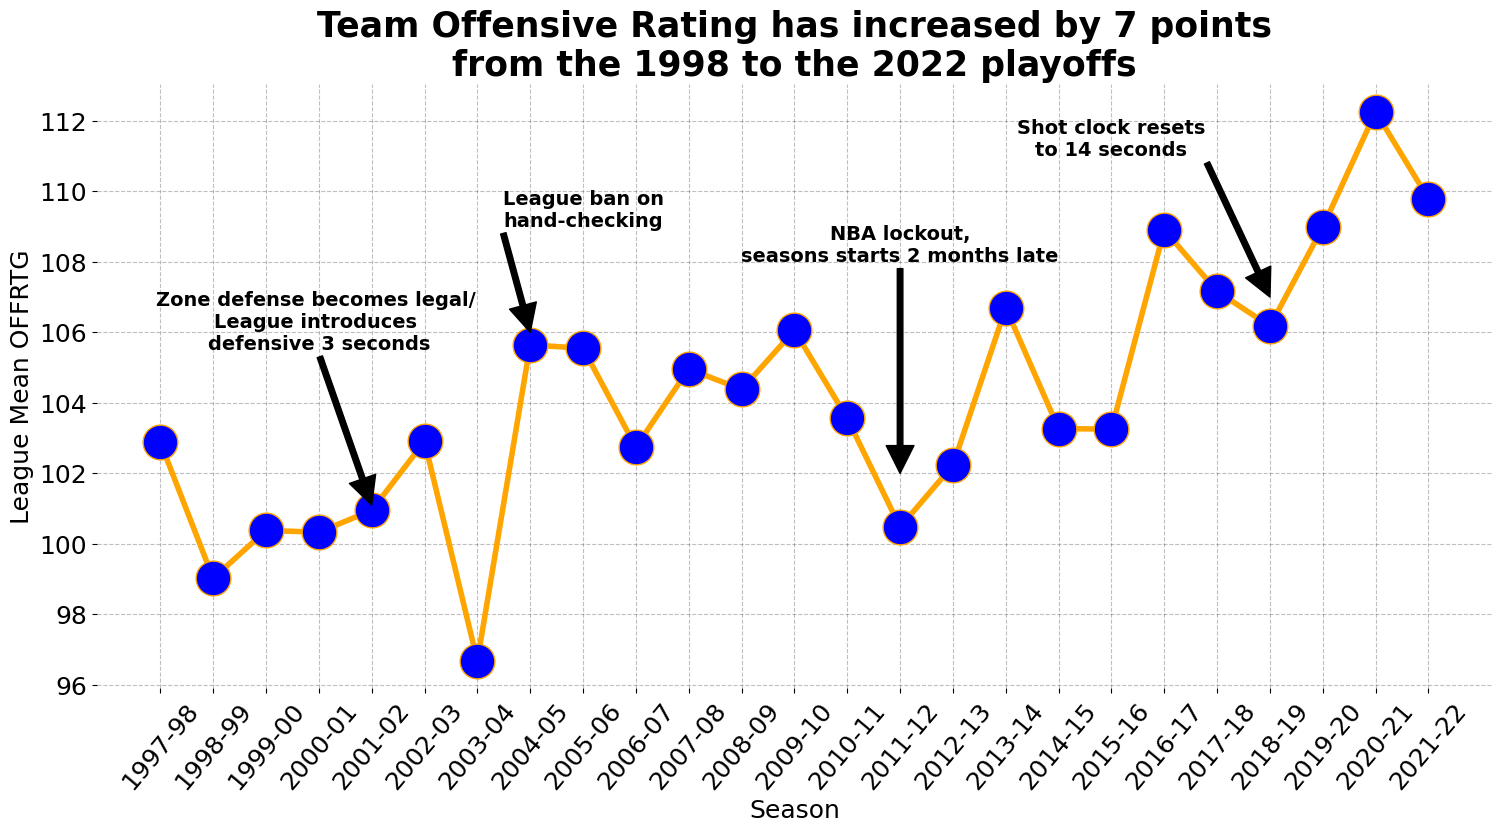

In [122]:
# graph to show mean offrtg from past 25 nba regular seasons
data = playoff_efficiency[['Mean OFFRTG']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)
plt.xlabel('Season', fontsize=18)
plt.ylabel('League Mean OFFRTG', fontsize=18)

plt.title('''Team Offensive Rating has increased by 7 points
from the 1998 to the 2022 playoffs''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean OFFRTG', data=data, marker='o', markerfacecolor='blue', 
         markersize=25, color='orange', linewidth=4)

plt.annotate('''Shot clock resets
to 14 seconds'''
             , xy=('2018-19', 107), xytext=('2015-16', 111), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''NBA lockout,
seasons starts 2 months late'''
             , xy=('2011-12', 102), xytext=('2011-12', 108), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''League ban on
hand-checking'''
             , xy=('2004-05', 106), xytext=('2005-06', 109), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.annotate('''Zone defense becomes legal/ 
League introduces 
defensive 3 seconds'''
             , xy=('2001-02', 101.1), xytext=('2000-01', 105.5), 
             arrowprops=dict(headwidth=20, headlength=20, color='black')
             , weight='bold', fontsize=14, ha='center')

plt.grid(linestyle='--', color='black', alpha=.25)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

#plt.savefig('line chart team Offensive rating from the past 25 nba playoffs.pdf',bbox_inches='tight')
plt.show()

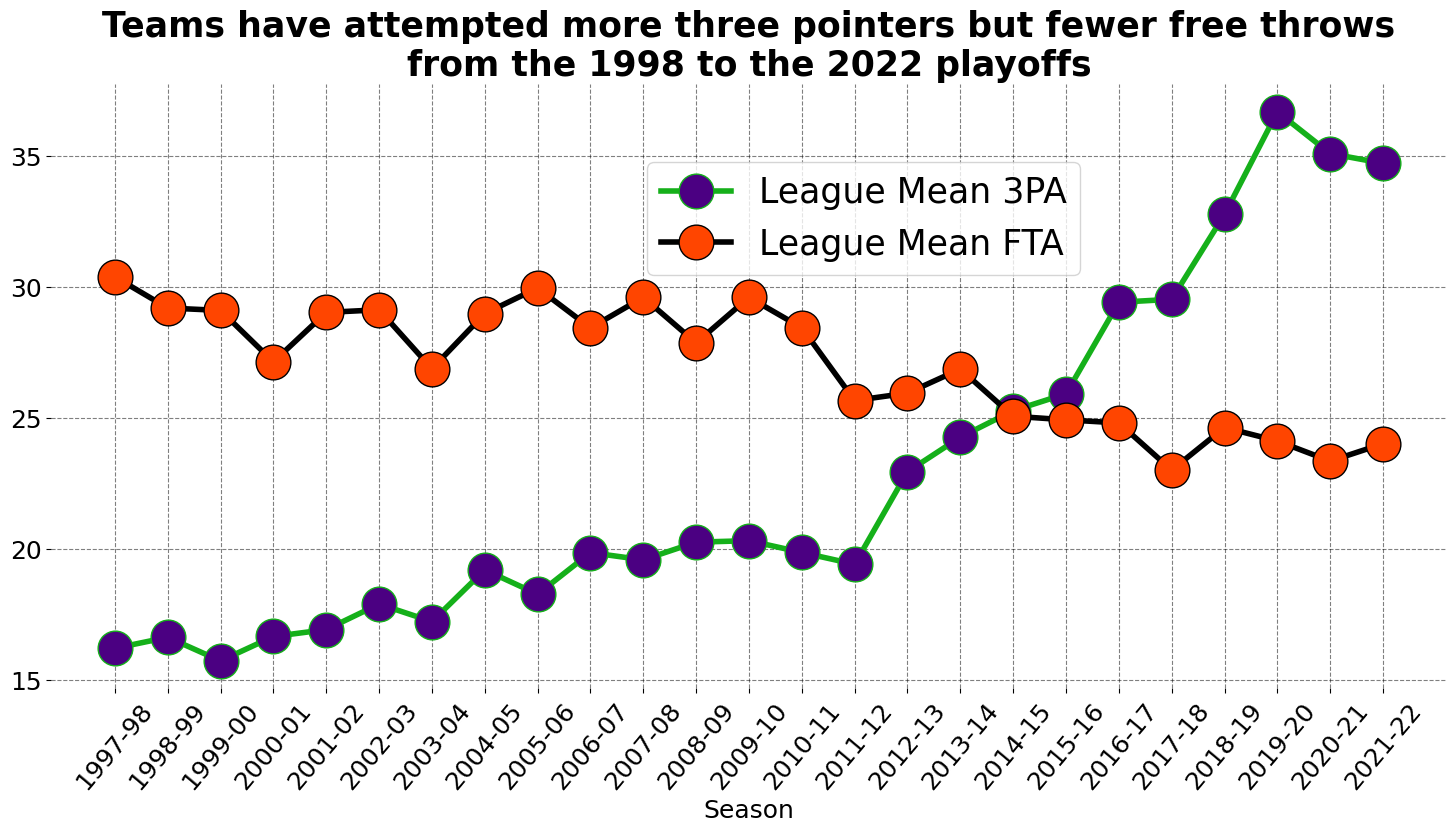

In [68]:
data = playoff_efficiency[['Mean 3PA', 'Mean FTA']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)

plt.xlabel('Season', fontsize=18)
plt.title('''Teams have attempted more three pointers but fewer free throws
from the 1998 to the 2022 playoffs''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean 3PA', data=data, marker='o', markerfacecolor='indigo', markersize=25, color='xkcd:green'
         , linewidth=4, label='League Mean 3PA')
plt.plot('Season', 'Mean FTA', data=data, marker='o', markerfacecolor='orangered', markersize=25, color='black'
         , linewidth=4, label='League Mean FTA')


plt.grid(linestyle='--', color='black', alpha=.5)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

plt.legend(bbox_to_anchor=[.75,.9],prop={'size': 25})

#plt.savefig('Team 3PAs and FTAs from the past 25 NBA playoffs.pdf',bbox_inches='tight')
plt.show()


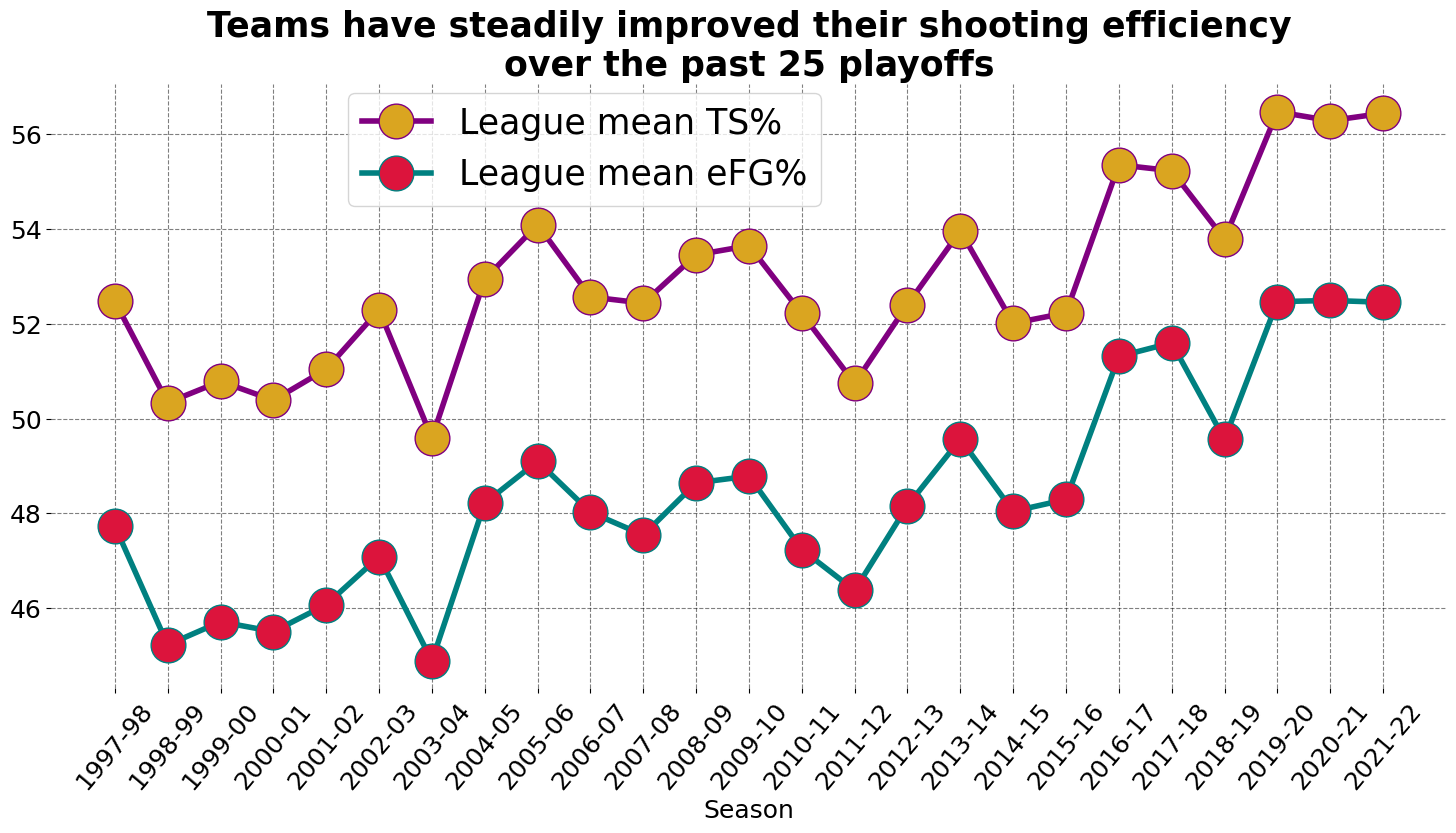

In [614]:
data = playoff_efficiency[['Mean eFG%', 'Mean TS%']].reset_index().iloc[::-1]

plt.figure(figsize=(18,8), dpi=100)
plt.xlabel('Season', fontsize=18)
plt.title('''Teams have steadily improved their shooting efficiency
over the past 25 playoffs''', fontsize=25, weight='bold')

plt.plot('Season', 'Mean TS%', data=data, marker='o', markerfacecolor='goldenrod', 
         markersize=25, color='purple'
         , linewidth=4, label='League mean TS%')

plt.plot('Season', 'Mean eFG%', data=data, marker='o', markerfacecolor='crimson', 
         markersize=25, color='teal'
         , linewidth=4, label='League mean eFG%')


plt.grid(linestyle='--', color='black', alpha=.5)
yticks = plt.yticks(fontsize=18)
xticks = plt.xticks(fontsize=18, rotation=50)
plt.box()

plt.legend(bbox_to_anchor=[.2,.77],prop={'size': 25})

#plt.savefig('Team TS% and eFG% from the past 25 NBA playoffs.pdf',bbox_inches='tight')
plt.show()


### 2) What is the best metric that predicts winning in the NBA during the playoffs?

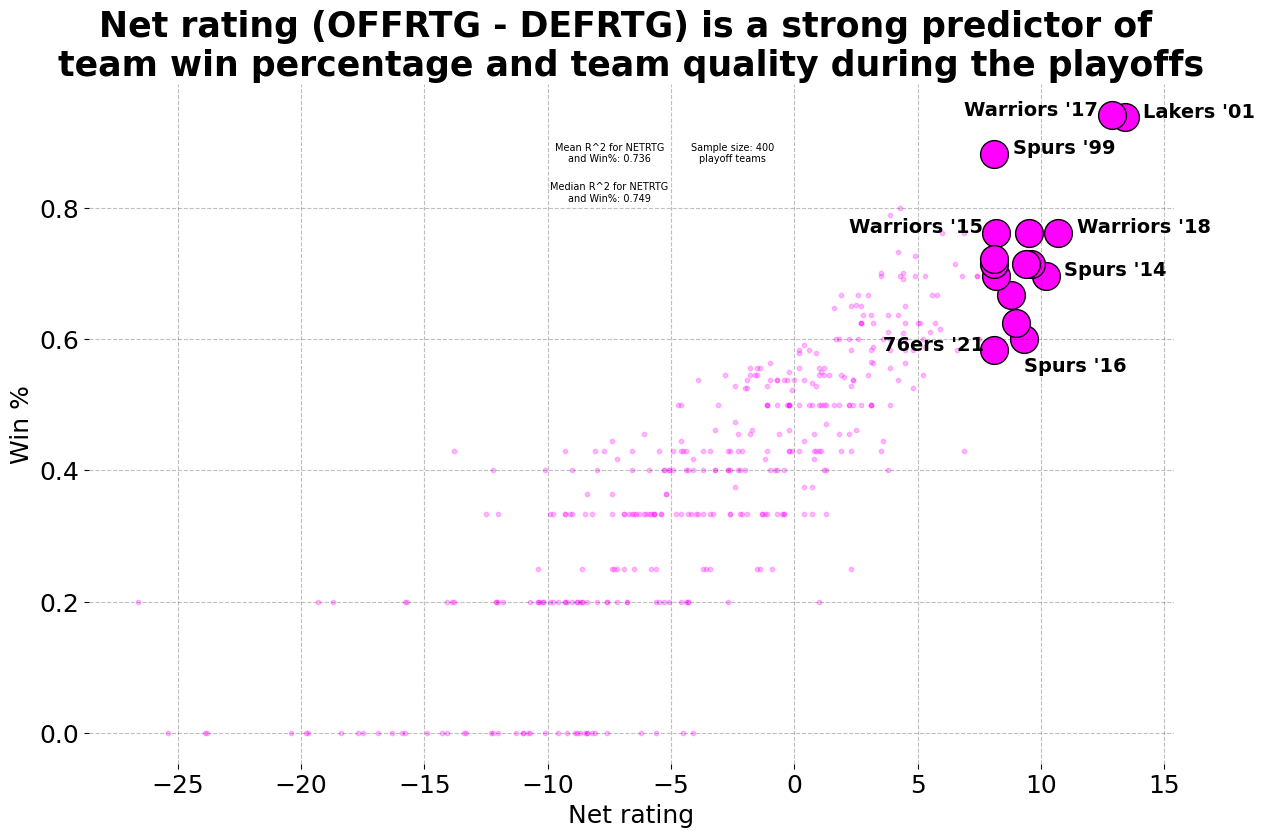

In [123]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','NETRTG','WIN%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('NETRTG', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0]) >= 8.1]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.1]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.1]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net rating', 
              xlabelsize=18, xticksize=18, ylabel='Win %', ylabelsize=18, yticksize=18, title = 
'''Net rating (OFFRTG - DEFRTG) is a strong predictor of 
team win percentage and team quality during the playoffs''', titlefontsize=25, marker='o', 
              scattercolor='fuchsia',df2=df2, s2=400
             )
plt.text(-7.5, .87 , 
'''Mean R^2 for NETRTG
and Win%: {value}'''.format(value = round(playoff_efficiency['R^2 of NETRTG and Win% for Teams'].mean(), 3)),
        ha='center', fontsize=7)
plt.text(-7.5, .81, 
'''Median R^2 for NETRTG
and Win%: {value}'''.format(value = round(playoff_efficiency['R^2 of NETRTG and Win% for Teams'].median(), 3)),
        ha='center', fontsize=7)
plt.text(-2.5, .87, '''Sample size: 400
playoff teams''', ha='center', fontsize=7)
plt.text(13.4+.75, 0.938, "Lakers '01", fontsize=14, weight='bold')
plt.text(12.9-6, 0.941, "Warriors '17", fontsize=14, weight='bold')
plt.text(10.7+.75, 0.762, "Warriors '18", fontsize=14, weight='bold')
plt.text(10.2+.75, 0.696, "Spurs '14", fontsize=14, weight='bold')
plt.text(9.3, 0.6-.05, "Spurs '16", fontsize=14, weight='bold')
plt.text(8.2-6, 0.762, "Warriors '15", fontsize=14, weight='bold')
plt.text(8.1+.75, 0.882, "Spurs '99", fontsize=14, weight='bold')
plt.text(8.1-4.5, 0.583, "76ers '21", fontsize=14, weight='bold')

#plt.savefig('playoffs net rating is a strong predictor of winning and team quality.pdf', bbox_inches='tight')
plt.show()

### 3) What is the relationship between offensive rating/defensive rating and team quality in the NBA during the playoffs?

In [163]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('W', ascending=False).iloc[0:4][['TEAM','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1['Better on Offense or Defense?'] = ['Defense', 'Offense', 'Offense', 'Defense', 
 'Defense', 'Offense', 'Defense', 'Defense',
 'Defense', 'Offense', 'Offense', 'Offense',
 'Offense', 'Defense', 'Offense', 'Defense',
 'Defense', 'Offense', 'Defense', 'Defense',
 'Offense', 'Offense', 'Offense', 'Offense',
 'Offense', 'Offense', 'Offense', 'Defense',
 'Defense', 'Defense', 'Defense', 'Offense',
 'Defense', 'Offense', 'Defense', 'Offense',
 'Defense', 'Offense', 'Offense', 'Defense',
 'Defense', 'Offense', 'Offense', 'Offense',
 'Defense', 'Offense', 'Defense', 'Offense',
 'Defense', 'Offense', 'Defense', 'Offense',
 'Offense', 'Offense', 'Defense', 'Defense',
 'Defense', 'Defense', 'Offense', 'Defense',
 'Defense', 'Defense', 'Offense', 'Offense',
 'Defense', 'Defense', 'Defense', 'Offense',
 'Defense', 'Defense', 'Offense', 'Defense',
 'Defense', 'Defense', 'Offense', 'Offense',
 'Offense', 'Defense', 'Defense', 'Defense',
 'Defense', 'Offense', 'Defense', 'Offense',
 'Offense', 'Offense', 'Offense', 'Defense',
 'Offense', 'Offense', 'Defense', 'Offense',
 'Offense', 'Defense', 'Defense', 'Defense',
 'Defense', 'Offense', 'Offense', 'Defense']

df1.head()

,TEAM,Net OFFRTG from league average,Net DEFRTG from league average,Better on Offense or Defense?
0,Boston Celtics '22,0.51250,-6.28125,Defense
1,Dallas Mavericks '22,4.11250,0.71875,Offense
2,Golden State Warriors '22,4.71250,-2.98125,Offense
3,Miami Heat '22,0.91250,-5.58125,Defense
4,Atlanta Hawks '21,-3.45625,-5.15625,Defense


In [164]:
# top 4 teams from 1998-2022 playoffs
count_top4s = df1.groupby('Better on Offense or Defense?').size().reset_index(name='counts').sort_values(by='counts', ascending=True)
count_top4s

,Better on Offense or Defense?,counts
1,Offense,49
0,Defense,51


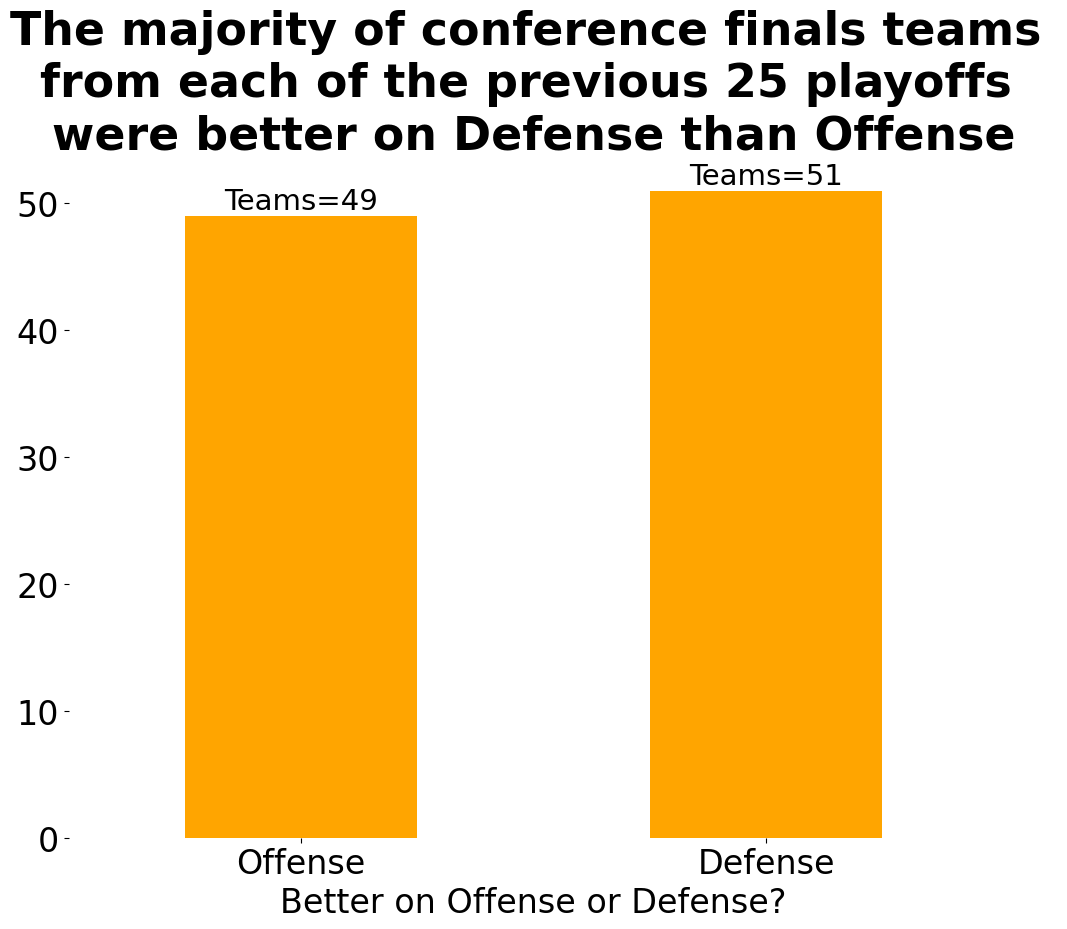

In [165]:
plt.figure(figsize=(12,9), dpi=100)
df1['Better on Offense or Defense?'].value_counts(ascending=True).plot.bar(color='orange')

yticks=plt.yticks(fontsize=24)
xticks = plt.xticks(fontsize=24, rotation=0)

plt.title('''The majority of conference finals teams 
from each of the previous 25 playoffs 
were better on Defense than Offense''', fontsize=33, weight='bold')

plt.xlabel('Better on Offense or Defense?', fontsize=24)

for i in range(len(count_top4s.values)):
        plt.text(i, count_top4s.iloc[i,1]+.5, 
                 'Teams' + '=' + str(count_top4s.iloc[i,1]), ha='center',
                fontsize=21)
plt.box()
#plt.savefig('conference finals teams offense vs. defense past 25.pdf',bbox_inches='tight')
plt.show()

In [170]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('W', ascending=False).iloc[0:2][['TEAM','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1['Better on Offense or Defense?'] = ['Defense', 'Offense',
 'Defense', 'Defense',
 'Offense', 'Offense',
 'Offense', 'Defense',
 'Offense', 'Defense',
 'Offense', 'Offense',
 'Offense', 'Offense',
 'Defense', 'Defense',
 'Offense', 'Offense',
 'Offense', 'Defense',
 'Offense', 'Offense',
 'Offense', 'Defense',
 'Defense', 'Offense',
 'Defense', 'Defense',
 'Defense', 'Offense',
 'Defense', 'Offense',
 'Defense', 'Defense',
 'Defense', 'Defense',
 'Defense', 'Offense',
 'Defense', 'Defense',
 'Offense', 'Defense',
 'Offense', 'Offense',
 'Offense', 'Offense',
 'Defense', 'Defense',
 'Defense', 'Defense']
df1.head()

,TEAM,Net OFFRTG from league average,Net DEFRTG from league average,Better on Offense or Defense?
0,Boston Celtics '22,0.51250,-6.28125,Defense
1,Golden State Warriors '22,4.71250,-2.98125,Offense
2,Milwaukee Bucks '21,-0.05625,-8.85625,Defense
3,Phoenix Suns '21,0.94375,-6.65625,Defense
4,Los Angeles Lakers '20,6.61250,-3.50000,Offense


In [172]:
# top 2 teams from 1998-2022 playoffs
count_top4s = df1.groupby('Better on Offense or Defense?').size().reset_index(name='counts').sort_values(by='counts', ascending=True)
count_top4s

,Better on Offense or Defense?,counts
1,Offense,24
0,Defense,26


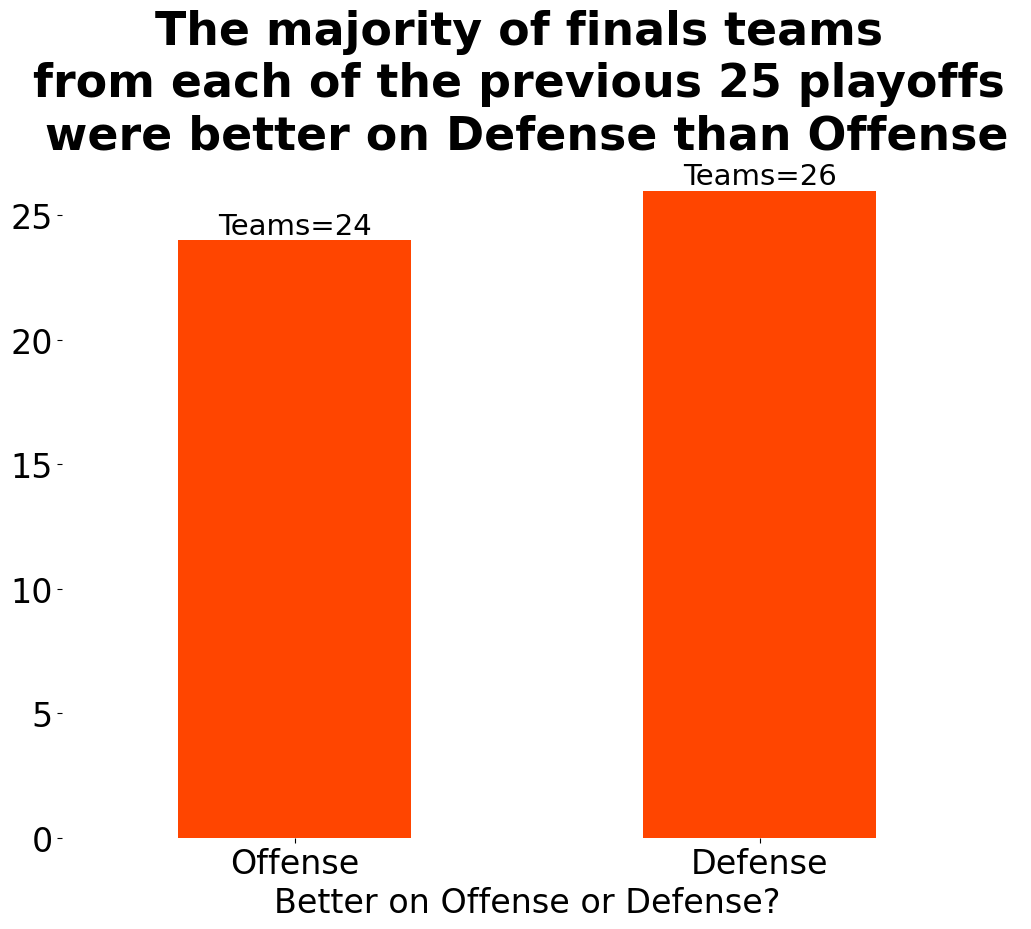

In [177]:
plt.figure(figsize=(12,9), dpi=100)
df1['Better on Offense or Defense?'].value_counts(ascending=True).plot.bar(color='orangered')

yticks=plt.yticks(fontsize=24)
xticks = plt.xticks(fontsize=24, rotation=0)

plt.title('''The majority of finals teams 
from each of the previous 25 playoffs 
were better on Defense than Offense''', fontsize=33, weight='bold')

plt.xlabel('Better on Offense or Defense?', fontsize=24)

for i in range(len(count_top4s.values)):
        plt.text(i, count_top4s.iloc[i,1]+.25, 
                 'Teams' + '=' + str(count_top4s.iloc[i,1]), ha='center',
                fontsize=21)
plt.box()
#plt.savefig('finals teams offense vs. defense past 25.pdf',bbox_inches='tight')
plt.show()

In [38]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('W', ascending=False).iloc[:1][['TEAM','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1['Better on Offense or Defense?'] =['Offense',
 'Defense',
 'Offense',
 'Defense',
 'Defense',
 'Offense',
 'Offense',
 'Defense',
 'Offense',
 'Offense',
 'Offense',
 'Offense',
 'Offense',
 'Defense',
 'Defense',
 'Offense',
 'Defense',
 'Defense',
 'Defense',
 'Defense',
 'Offense',
 'Offense',
 'Offense',
 'Defense',
 'Defense']
df1.head()

,TEAM,Net OFFRTG from league average,Net DEFRTG from league average,Better on Offense or Defense?
0,Golden State Warriors '22,4.71250,-2.98125,Offense
1,Milwaukee Bucks '21,-0.05625,-8.85625,Defense
2,Los Angeles Lakers '20,6.61250,-3.50000,Offense
3,Toronto Raptors '19,3.62500,-5.76875,Defense
4,Golden State Warriors '18,5.53750,-7.04375,Defense


In [39]:
# champions from 1998-2022 playoffs
count_top4s = df1.groupby('Better on Offense or Defense?').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
count_top4s

,Better on Offense or Defense?,counts
1,Offense,13
0,Defense,12


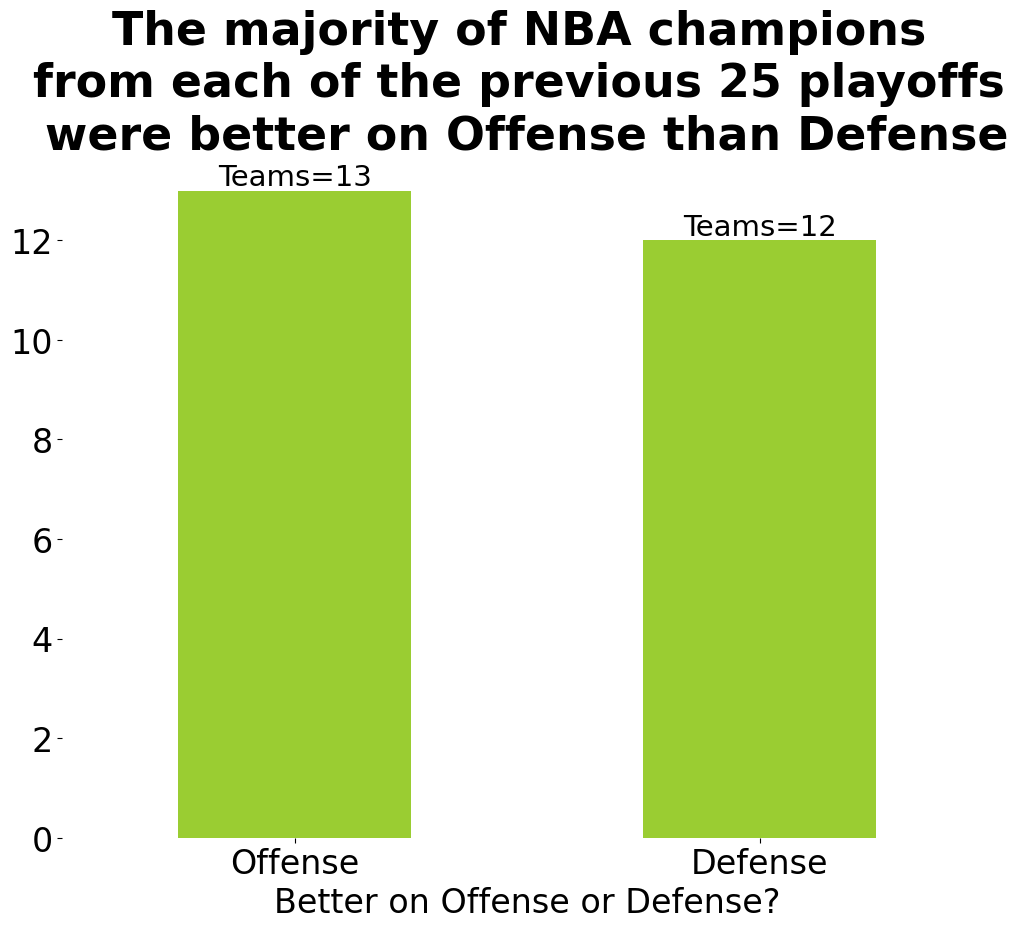

In [40]:
plt.figure(figsize=(12,9), dpi=100)
df1['Better on Offense or Defense?'].value_counts(ascending=False).plot.bar(color='yellowgreen')

yticks=plt.yticks(fontsize=24)
xticks = plt.xticks(fontsize=24, rotation=0)

plt.title('''The majority of NBA champions 
from each of the previous 25 playoffs 
were better on Offense than Defense''', fontsize=33, weight='bold')

plt.xlabel('Better on Offense or Defense?', fontsize=24)

for i in range(len(count_top4s.values)):
        plt.text(i, count_top4s.iloc[i,1]+.1, 
                 'Teams' + '=' + str(count_top4s.iloc[i,1]), ha='center',
                fontsize=21)
plt.box()
plt.savefig('champions offense vs. defense past 25.pdf',bbox_inches='tight')
plt.show()

In [208]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index().sort_values('W', ascending=False).iloc[0:1][['TEAM', 'W','Net OFFRTG from league average',
                                                                               'Net DEFRTG from league average','NETRTG',
                                                                               'EFG%', 'TS%']]
    variable2 = df.reset_index().sort_values('W', ascending=True).iloc[0:1][['TEAM', 'W','Net OFFRTG from league average',
                                                                           'Net DEFRTG from league average','NETRTG',
                                                                           'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    variable['Best or worst team that season?'] = 'Best'
    variable2['TEAM'] = variable2['TEAM'] + ' \'' + str(x)[-2:]
    variable2['Best or worst team that season?'] = 'Worst'
    variable.sort_values('TEAM', ascending=True, inplace=True)
    variable2.sort_values('TEAM', ascending=True, inplace=True)
    lst.append(variable)
    lst.append(variable2)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
df1

,W,Net OFFRTG from league average,Net DEFRTG from league average,NETRTG,EFG%,TS%,Best or worst team that season?
TEAM,,,,,,,
Golden State Warriors '22,16,4.71250,-2.98125,4.9,56.1,59.0,Best
Brooklyn Nets '22,0,5.21250,6.61875,-4.1,57.7,61.0,Worst
Milwaukee Bucks '21,16,-0.05625,-8.85625,5.3,52.4,55.0,Best
Miami Heat '21,0,-16.85625,-0.65625,-19.7,46.2,49.9,Worst
Los Angeles Lakers '20,16,6.61250,-3.50000,6.9,56.1,59.5,Best
Brooklyn Nets '20,0,-6.58750,10.70000,-20.4,48.2,51.8,Worst
Toronto Raptors '19,16,3.62500,-5.76875,5.6,51.5,56.1,Best
Detroit Pistons '19,0,-9.37500,10.53125,-23.8,44.4,47.1,Worst
Golden State Warriors '18,16,5.53750,-7.04375,10.7,54.5,58.1,Best


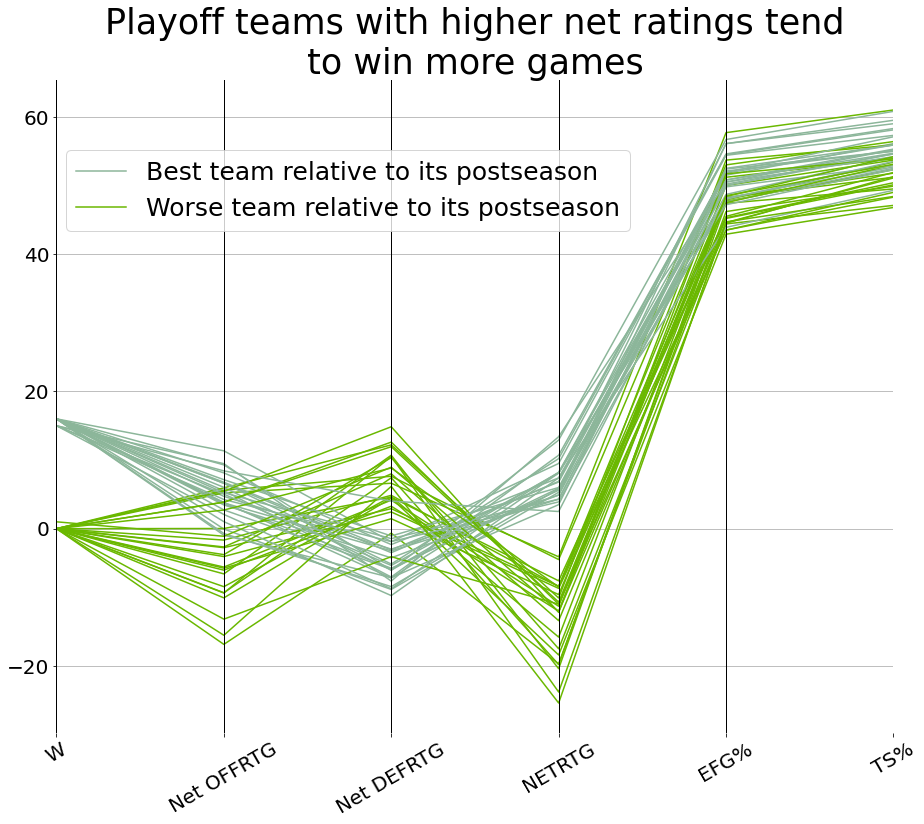

In [212]:
plt.figure(figsize=(15,12))
pcp(df1, 'Best or worst team that season?')
xticks = plt.xticks()
plt.xticks(fontsize=20, rotation=30, ticks = [0,1,2,3,4,5], labels = ['W', 'Net OFFRTG', 'Net DEFRTG', 'NETRTG', 'EFG%', 'TS%'])
plt.yticks(fontsize=20, rotation=0)
plt.title('''Playoff teams with higher net ratings tend
to win more games''', fontsize=35)
handles, labels = plt.gca().get_legend_handles_labels()

labels = ['Best team relative to its postseason', 'Worse team relative to its postseason']

order = [0,1]

plt.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=[.7,.75],
           prop={'size': 25})

plt.box()

#plt.savefig('Parallel coordinates plot past 25 playoffs.pdf', bbox_inches='tight')
plt.show()

### 4) How much has the relationships between offensive/defensive rating and team quality changed throughout the years?

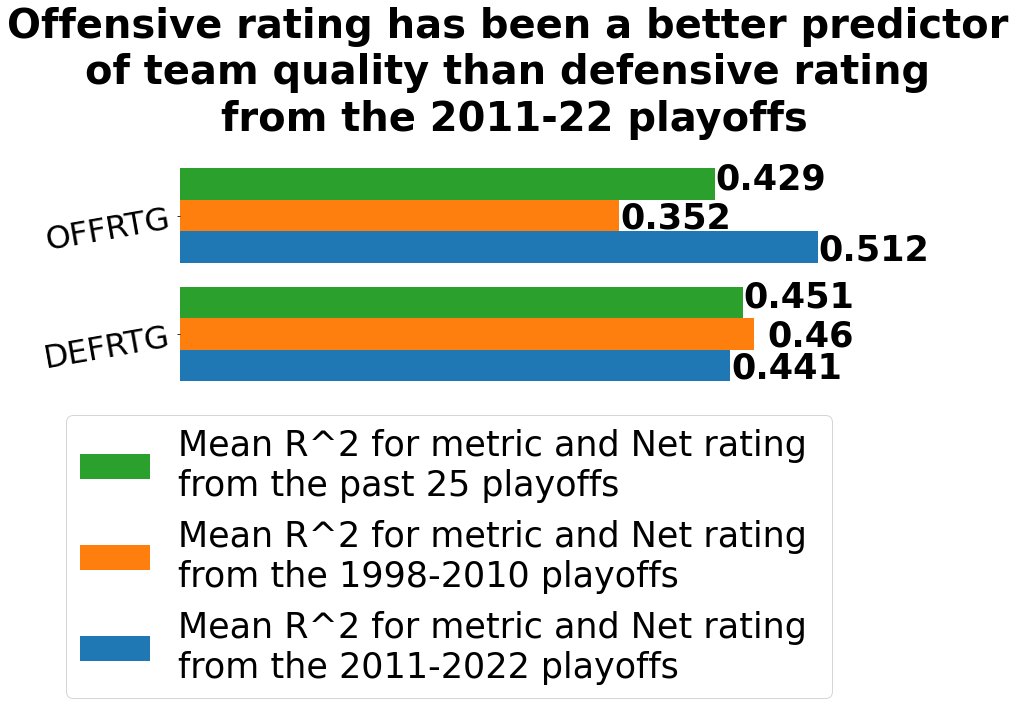

In [226]:
Metrics = pd.DataFrame({
    'Metric being correlated with NETRTG': ['OFFRTG', 'DEFRTG'],
    
    'Mean R^2 from the past 25 playoffs': 
                                [playoff_efficiency['R^2 of OFFRTG and NETRTG for Teams'].mean(),
                                playoff_efficiency['R^2 of DEFRTG and NETRTG for Teams'].mean()],
    'Mean R^2 from the 1997-2009 playoffs':
                                [Efficiency1998_2010['R^2 of OFFRTG and NETRTG for Teams'].mean(),
                                Efficiency1998_2010['R^2 of DEFRTG and NETRTG for Teams'].mean()],
    'Mean R^2 from the 2010-2021 playoffs':
    [Efficiency2011_2022['R^2 of OFFRTG and NETRTG for Teams'].mean(),
Efficiency2011_2022['R^2 of DEFRTG and NETRTG for Teams'].mean()]
    
})

Metrics.set_index('Metric being correlated with NETRTG', inplace=True)

Metrics = Metrics.iloc[:,[2,1,0]]

Metrics

CreateTripleBarH(Metrics, figsize=(12,5), title= 
'''Offensive rating has been a better predictor 
of team quality than defensive rating 
from the 2011-22 playoffs''', titlefontsize=40, xticksize=32, 
           yticksize=32, ytickrotate=10, 
           upperbarshiftup=.225, lowerbarshiftdown=.375,
           shiftupperbarleft=-.045, shiftlowerbarleft=-.045, textbarfontsize=35, textbarcolor='black', 
            legend_labels= 
['''Mean R^2 for metric and Net rating 
from the 2011-2022 playoffs''', '''Mean R^2 for metric and Net rating 
from the 1998-2010 playoffs''', '''Mean R^2 for metric and Net rating 
from the past 25 playoffs'''], legend_order=[2,1,0], legend_pos=[1,.05], width=.8, legend_size=35, middlebarshiftup=-.1,
                shiftmiddlebarleft=-.045 
          )

plt.xticks([])

#plt.savefig('playoffs offensive rating is a better predictor of team quality than defensive rating.pdf'
#, bbox_inches='tight')
plt.show()

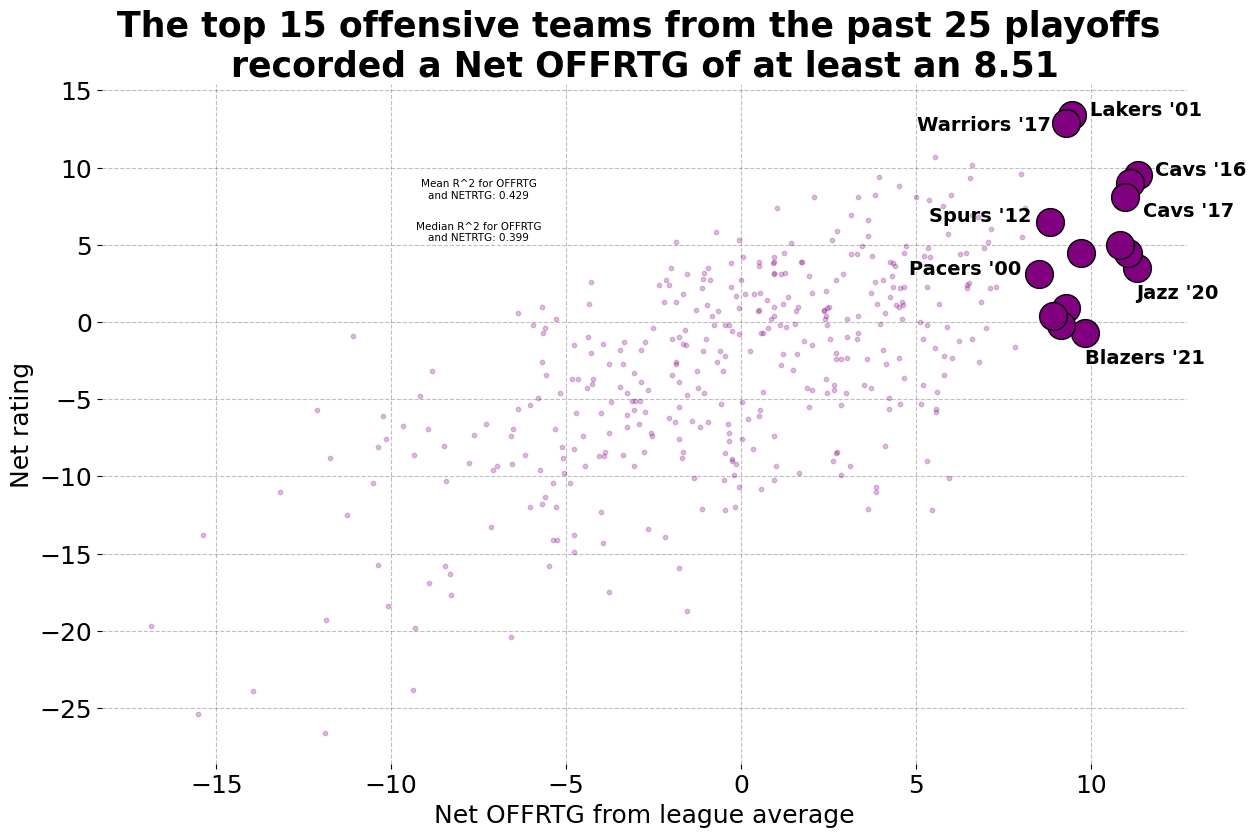

In [615]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.51875]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.51875]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 8.51875]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', 
              xlabelsize=18, xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title = 
'''The top 15 offensive teams from the past 25 playoffs 
recorded a Net OFFRTG of at least an 8.51''', titlefontsize=25, marker='o', 
              scattercolor='purple',df2=df2, s2=400
             )

plt.text(-7.5, 8 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-7.5, 5.25 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(11.34375+.5, 9.5, "Cavs '16", fontsize=14, weight='bold')
plt.text(11.312499999999986, 3.5-2, "Jazz '20", fontsize=14, weight='bold')
plt.text(10.993750000000006+.5, 8.1-1.25, "Cavs '17", fontsize=14, weight='bold')
plt.text(9.843750000000014, -0.7-2, "Blazers '21", fontsize=14, weight='bold')
plt.text(9.468749999999986+.5, 13.4, "Lakers '01", fontsize=14, weight='bold')
plt.text(9.293750000000003-4.25, 12.9-.5, "Warriors '17", fontsize=14, weight='bold')
plt.text(8.824999999999989-3.45, 6.5, "Spurs '12", fontsize=14, weight='bold')
plt.text(8.518750000000011-3.7, 3.1, "Pacers '00", fontsize=14, weight='bold')

#plt.savefig('top offensive teams past 25 playoffs.pdf', bbox_inches='tight')
plt.show()

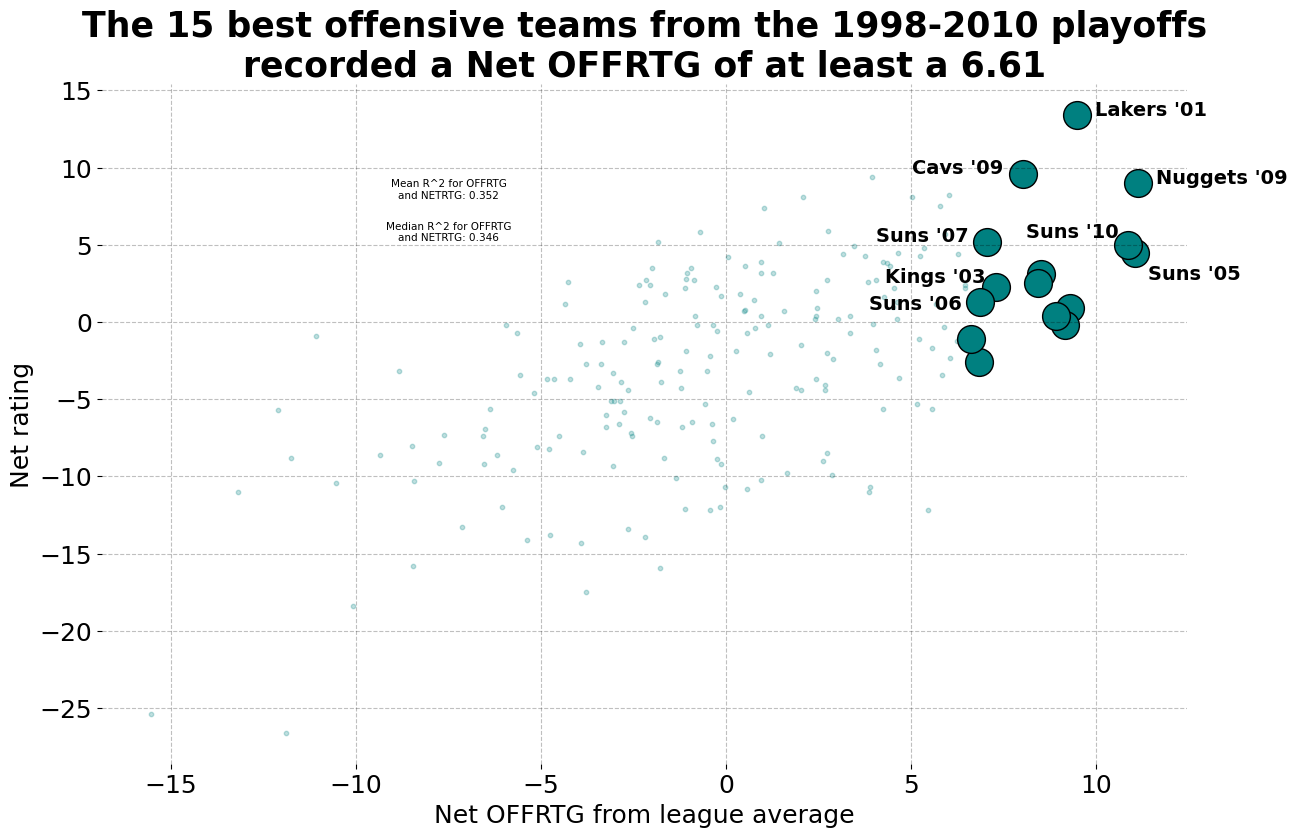

In [317]:
x = 2010
lst = []
for df in teams_98_10:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.61875]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.61875]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.61875]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title= 
'''The 15 best offensive teams from the 1998-2010 playoffs
recorded a Net OFFRTG of at least a 6.61''', titlefontsize=25, marker='o', 
scattercolor='teal', df2=df2, s2=400
             )

plt.text(-7.5, 8 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-7.5, 5.25 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(11.118750000000006+.5, 9.0, "Nuggets '09", fontsize=14, weight='bold')
plt.text(11.05625000000002+.35, 4.5-1.75, "Suns '05", fontsize=14, weight='bold')
plt.text(10.84375-2.75, 5.0+.5, "Suns '10", fontsize=14, weight='bold')
plt.text(9.468749999999986+.5, 13.4, "Lakers '01", fontsize=14, weight='bold')
plt.text(8.018750000000011-3, 9.6, "Cavs '09", fontsize=14, weight='bold')
plt.text(7.293750000000003-3, 2.3+.25, "Kings '03", fontsize=14, weight='bold')
plt.text(7.0562499999999915-3, 5.2, "Suns '07", fontsize=14, weight='bold')
plt.text(6.84999999999998-3, 1.3-.5, "Suns '06", fontsize=14, weight='bold')

#plt.savefig('top offensive teams 1998-2010 playoffs.pdf', bbox_inches='tight')
plt.show()

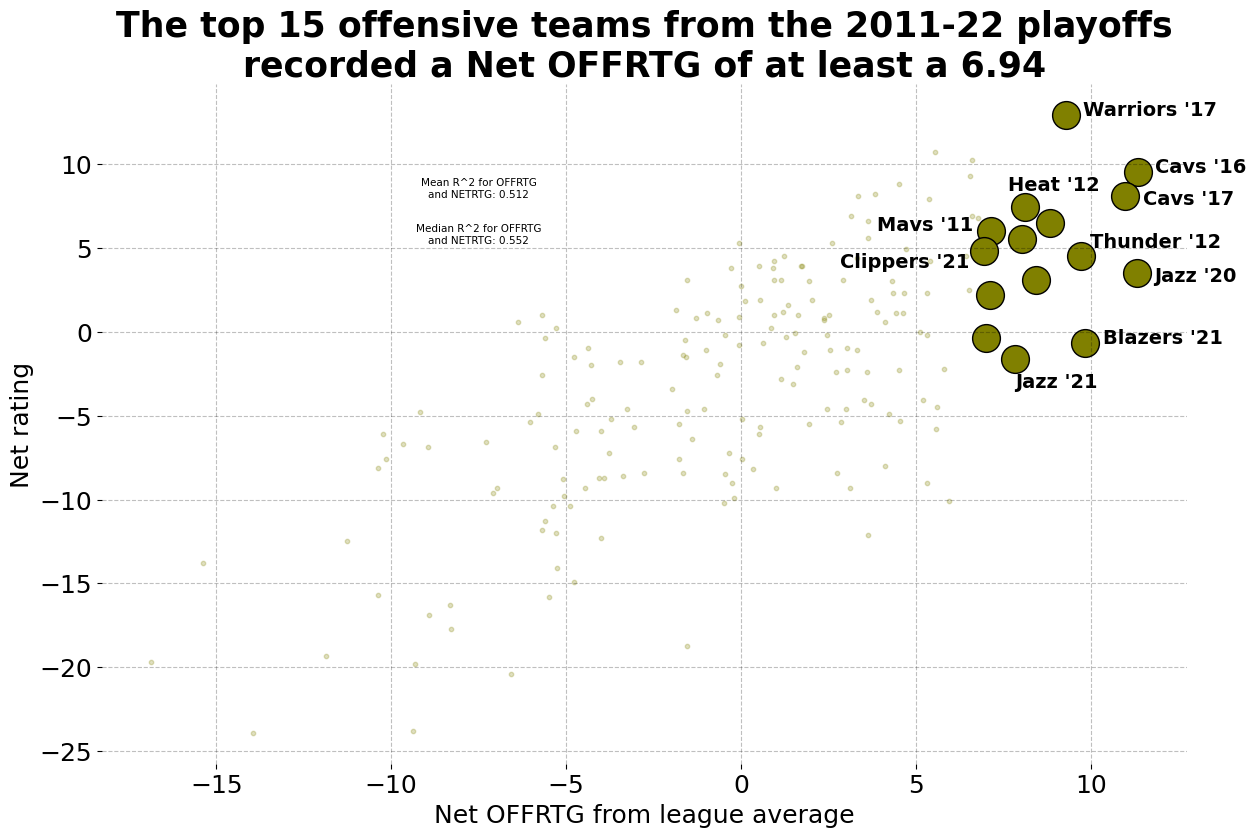

In [616]:
x = 2022
lst = []
for df in teams_11_22:
    variable = df.reset_index()[['TEAM','Net OFFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net OFFRTG from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.94375]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.94375]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 6.94375]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net OFFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title= 
'''The top 15 offensive teams from the 2011-22 playoffs
recorded a Net OFFRTG of at least a 6.94''', titlefontsize=25, marker='o', 
              scattercolor='olive', df2=df2, s2=400
             )

plt.text(-7.5, 8 , '''Mean R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of OFFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(-7.5, 5.25 , '''Median R^2 for OFFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of OFFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(11.34375+.5, 9.5, "Cavs '16", fontsize=14, weight='bold')
plt.text(11.312499999999986+.5, 3.5-.5, "Jazz '20", fontsize=14, weight='bold')
plt.text(10.993750000000006+.5, 8.1-.5, "Cavs '17", fontsize=14, weight='bold')
plt.text(9.843750000000014+.5, -0.7, "Blazers '21", fontsize=14, weight='bold')
plt.text(9.724999999999994+.25, 4.5+.5, "Thunder '12", fontsize=14, weight='bold')
plt.text(9.293750000000003+.5, 12.9, "Warriors '17", fontsize=14, weight='bold')
plt.text(8.124999999999986-.5, 7.4+1, "Heat '12", fontsize=14, weight='bold')
plt.text(7.843750000000014, -1.6-1.75, "Jazz '21", fontsize=14, weight='bold')
plt.text(7.137500000000003-3.25, 6.0, "Mavs '11", fontsize=14, weight='bold')
plt.text(6.943750000000023-4.1, 4.8-1, "Clippers '21", fontsize=14, weight='bold')

#plt.savefig('top offensive teams 2011-2022 playoffs.pdf', bbox_inches='tight')
plt.show()

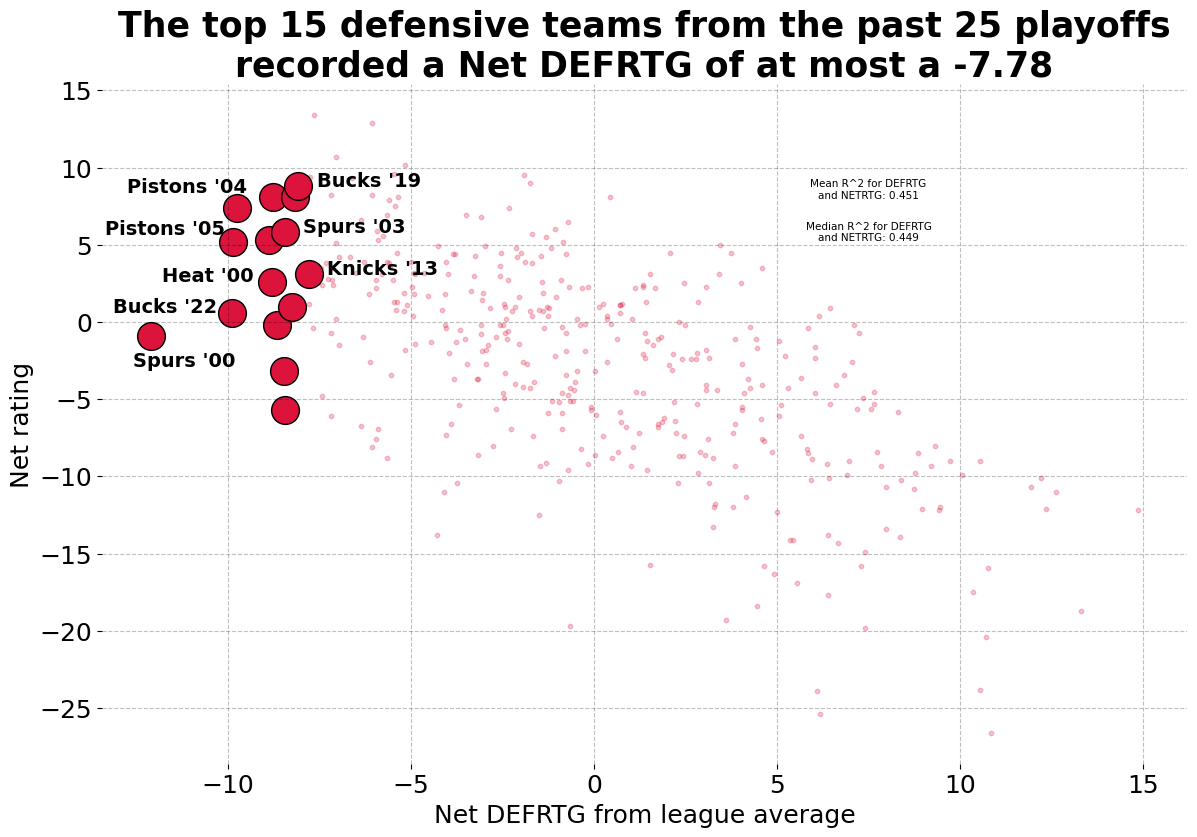

In [393]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0]) <= -7.78750]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0]) <= -7.78750]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0]) <= -7.78750]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the past 25 playoffs
recorded a Net DEFRTG of at most a -7.78''', titlefontsize=25, marker='o', scattercolor='crimson', df2=df2, s2=400
             )

plt.text(7.5, 8 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(7.5, 5.25 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(-12.081249999999983-.5, -0.9-2, "Spurs '00", fontsize=14, weight='bold')
plt.text(-9.881249999999994-3.25, 0.6, "Bucks '22", fontsize=14, weight='bold')
plt.text(-9.850000000000009-3.5, 5.2+.5, "Pistons '05", fontsize=14, weight='bold')
plt.text(-9.75-3, 7.4+1, "Pistons '04", fontsize=14, weight='bold')
plt.text(-8.781249999999986-3, 2.6, "Heat '00", fontsize=14, weight='bold')
plt.text(-8.443750000000009+.5, 5.8, "Spurs '03", fontsize=14, weight='bold')
plt.text(-8.06874999999998+.5, 8.8, "Bucks '19", fontsize=14, weight='bold')
plt.text(-7.7875000000000085+.5, 3.1, "Knicks '13", fontsize=14, weight='bold')

#plt.savefig('top defensive teams past 25 playoffs.pdf', bbox_inches='tight')
plt.show()

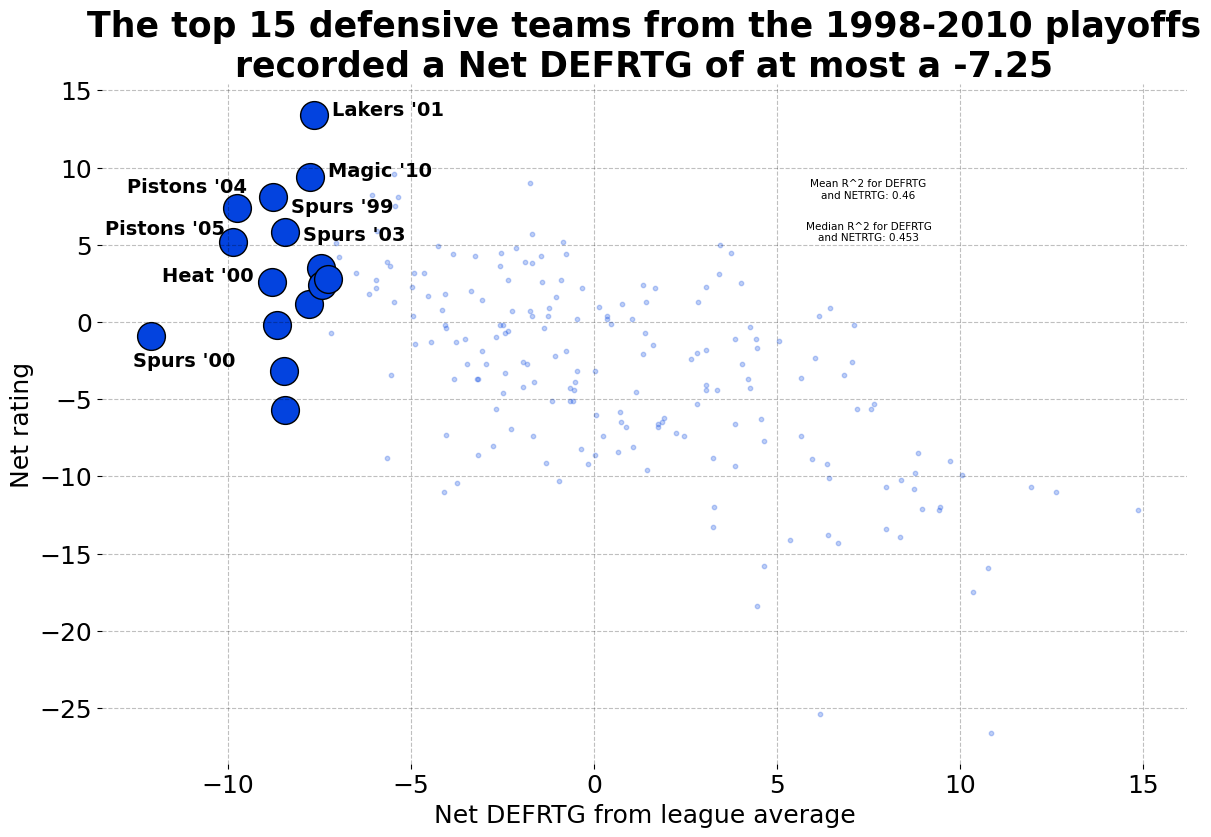

In [411]:
x = 2010
lst = []
for df in teams_98_10:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -7.25]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -7.25]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -7.25]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the 1998-2010 playoffs
recorded a Net DEFRTG of at most a -7.25''', titlefontsize=25, marker='o', scattercolor='xkcd:blue', df2=df2, s2=400
             )

plt.text(7.5, 8 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(7.5, 5.25 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)


plt.text(-12.081249999999983-.5, -0.9-2, "Spurs '00", fontsize=14, weight='bold')
plt.text(-9.850000000000009-3.5, 5.2+.5, "Pistons '05", fontsize=14, weight='bold')
plt.text(-9.75-3, 7.4+1, "Pistons '04", fontsize=14, weight='bold')
plt.text(-8.781249999999986-3, 2.6, "Heat '00", fontsize=14, weight='bold')
plt.text(-8.443750000000009+.5, 5.8-.5, "Spurs '03", fontsize=14, weight='bold')
plt.text(-8.756249999999994+.5, 8.1-1, "Spurs '99", fontsize=14, weight='bold')
plt.text(-7.750000000000014+.5, 9.4, "Magic '10", fontsize=14, weight='bold')
plt.text(-7.637499999999974+.5, 13.4, "Lakers '01", fontsize=14, weight='bold')

#plt.savefig('top defensive teams 1998-2010 playoffs.pdf', bbox_inches='tight')
plt.show()

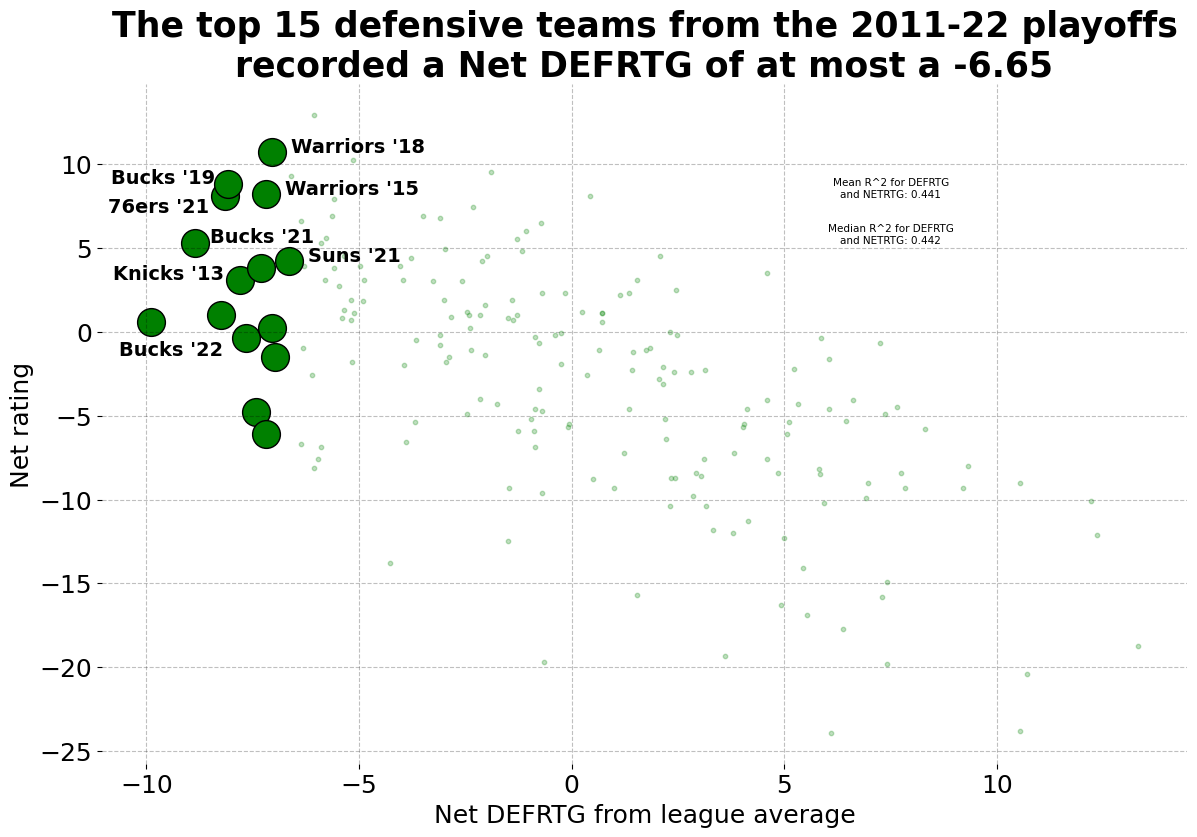

In [446]:
x = 2022
lst = []
for df in teams_11_22:
    variable = df.reset_index()[['TEAM','Net DEFRTG from league average','NETRTG']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net DEFRTG from league average', ascending=True)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -6.65625]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -6.65625]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])<= -6.65625]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net DEFRTG from league average', xlabelsize=18,
              xticksize=18, ylabel='Net rating', ylabelsize=18, yticksize=18, title=
'''The top 15 defensive teams from the 2011-22 playoffs
recorded a Net DEFRTG of at most a -6.65''', titlefontsize=25, marker='o', scattercolor='green', df2=df2, s2=400
             )

plt.text(7.5, 8 , '''Mean R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of DEFRTG and NETRTG for Teams'].mean(), 3)),
        ha='center', fontsize=7.5)
plt.text(7.5, 5.25 , '''Median R^2 for DEFRTG
and NETRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of DEFRTG and NETRTG for Teams'].median(), 3)),
        ha='center', fontsize=7.5)

plt.text(-9.881249999999994-.75, 0.6-2, "Bucks '22", fontsize=14, weight='bold')
plt.text(-8.856250000000003+.35, 5.3, "Bucks '21", fontsize=14, weight='bold')
plt.text(-8.15625-2.75, 8.1-1, "76ers '21", fontsize=14, weight='bold')
plt.text(-8.06874999999998-2.75, 8.8, "Bucks '19", fontsize=14, weight='bold')
plt.text(-7.7875000000000085-3, 3.1, "Knicks '13", fontsize=14, weight='bold')
plt.text(-7.1875+.45, 8.2, "Warriors '15", fontsize=14, weight='bold')
plt.text(-7.043750000000017+.45, 10.7, "Warriors '18", fontsize=14, weight='bold')
plt.text(-6.65625+.45, 4.2, "Suns '21", fontsize=14, weight='bold')

#plt.savefig('top defensive teams 2011-2022 playoffs.pdf', bbox_inches='tight')
plt.show()

### 5) What is the best metric that predicts offensive rating in the NBA during the regular season?

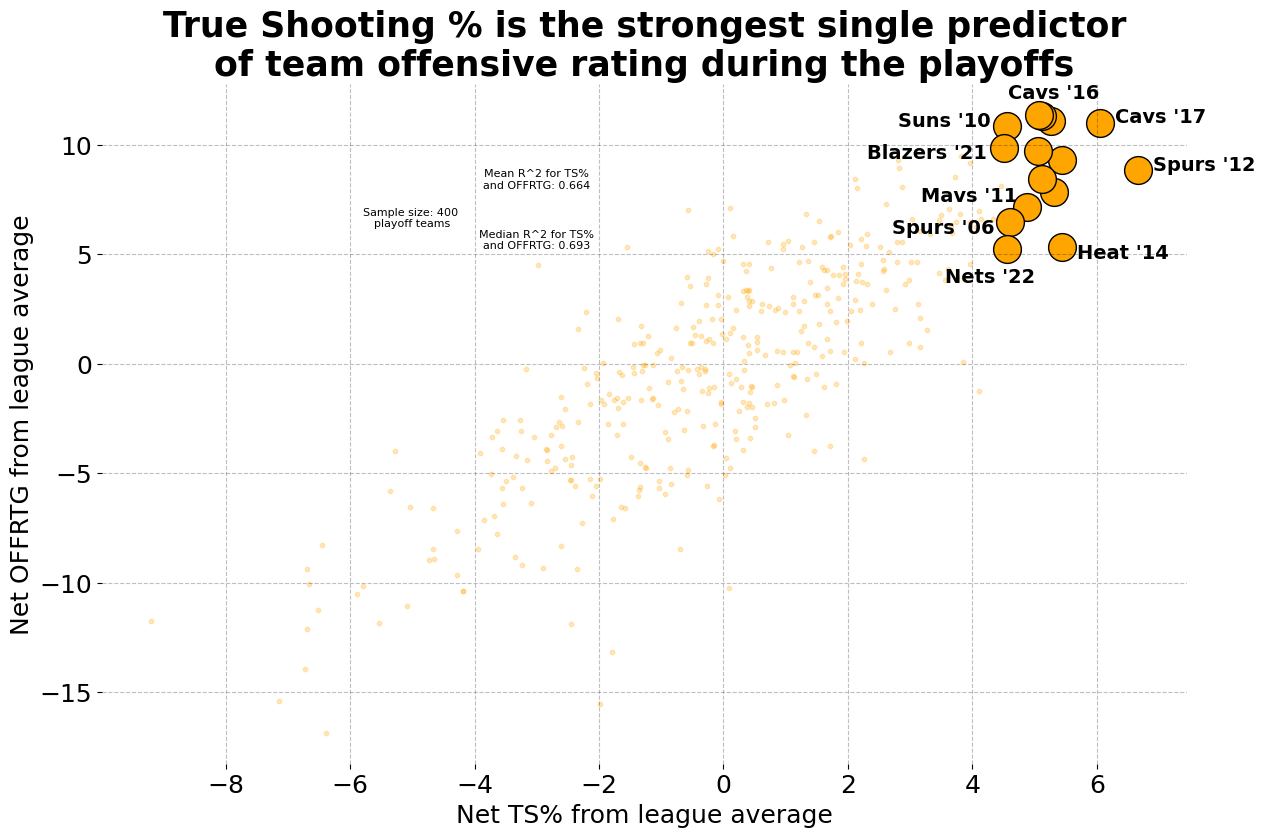

In [498]:
x = 2022
lst = []
for df in all_teams:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.51250]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.51250]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.51250]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net TS% from league average',
              xlabelsize=18, xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18,
              yticksize=18, title=
'''True Shooting % is the strongest single predictor
of team offensive rating during the playoffs''', titlefontsize=25, marker='o', scattercolor='orange', 
              df2=df2, s2=400
             )

plt.text(-3, 8, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(playoff_efficiency['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)
plt.text(-5, 6.25, '''Sample size: 400 
playoff teams''', ha='center', fontsize=8)

plt.text(6.656250000000007+.25, 8.824999999999989, "Spurs '12", fontsize=14, weight='bold')
plt.text(6.043749999999996+.25, 10.993750000000006, "Cavs '17", fontsize=14, weight='bold')
plt.text(5.437500000000007+.25, 5.3062499999999915-.5, "Heat '14", fontsize=14, weight='bold')
plt.text(5.068749999999994-.5, 11.34375+.75, "Cavs '16", fontsize=14, weight='bold')
plt.text(4.8812500000000085-1.7, 7.137500000000003+.25, "Mavs '11", fontsize=14, weight='bold')
plt.text(4.606250000000003-1.9, 6.449999999999974-.5, "Spurs '06", fontsize=14, weight='bold')
plt.text(4.5562499999999915-1, 5.212500000000006-1.5, "Nets '22", fontsize=14, weight='bold')
plt.text(4.549999999999997-1.75, 10.84375, "Suns '10", fontsize=14, weight='bold')
plt.text(4.512500000000003-2.2, 9.843750000000014-.5, "Blazers '21", fontsize=14, weight='bold')

#plt.savefig('playoffs TS% is the strongest single predictor of OFFRTG.pdf', bbox_inches='tight')
plt.show()

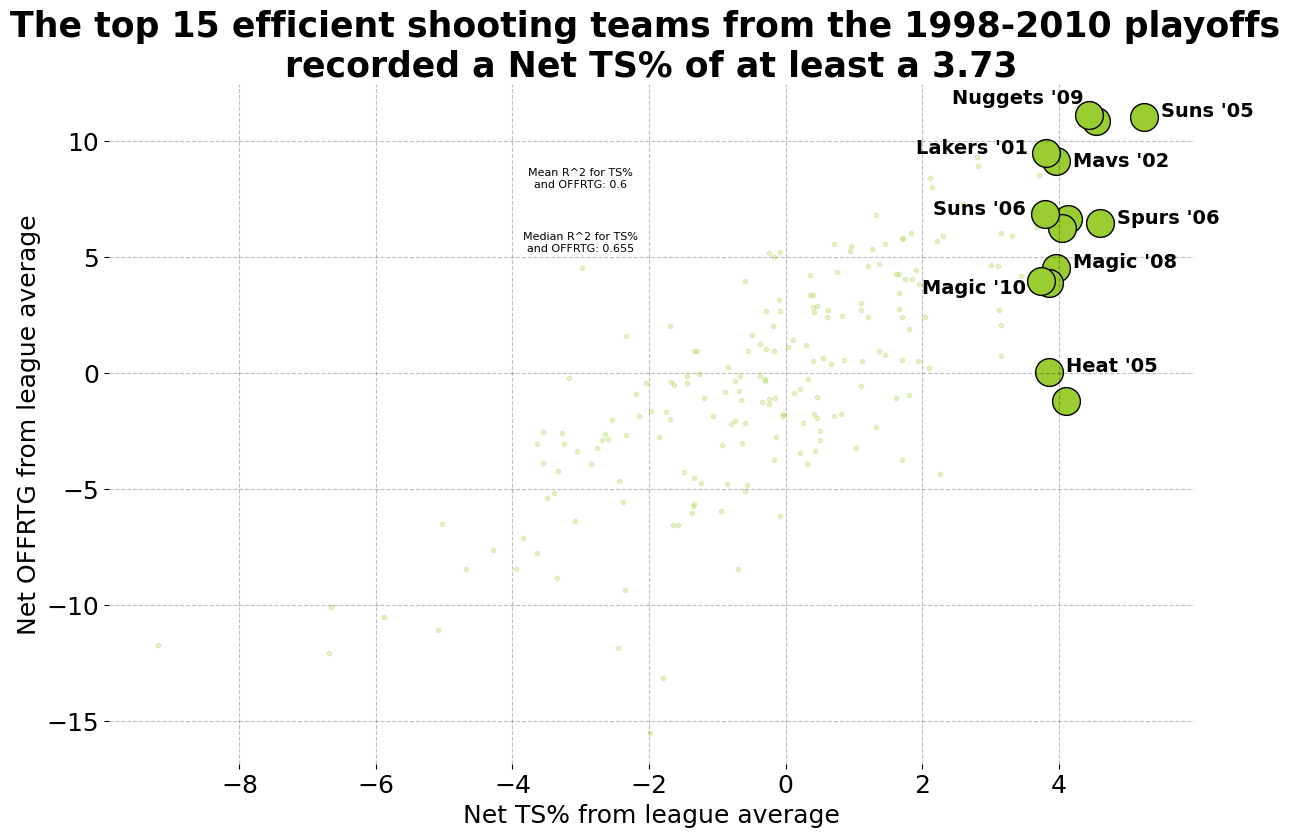

In [551]:
x = 2010
lst = []
for df in teams_98_10:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.73125]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.73125]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 3.73125]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.5, figsize=(14,9), dpi=100, xlabel='Net TS% from league average', xlabelsize=18,
              xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18, yticksize=18, title = 
'''The top 15 efficient shooting teams from the 1998-2010 playoffs 
recorded a Net TS% of at least a 3.73''', titlefontsize=25, marker='o', 
              scattercolor='yellowgreen',df2=df2, s2=400
             )

plt.text(-3, 8, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency1998_2010['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)

plt.text(5.256249999999994+.25, 11.05625000000002, "Suns '05", fontsize=14, weight='bold')
plt.text(4.606250000000003+.25, 6.449999999999974, "Spurs '06", fontsize=14, weight='bold')
plt.text(4.443749999999994-2, 11.118750000000006+.5, "Nuggets '09", fontsize=14, weight='bold')
plt.text(3.962500000000013+.25, 4.5375000000000085, "Magic '08", fontsize=14, weight='bold')
plt.text(3.9562500000000043+.25, 9.149999999999991-.25, "Mavs '02", fontsize=14, weight='bold')
plt.text(3.8562499999999886+.25, 0.056250000000019895, "Heat '05", fontsize=14, weight='bold')
plt.text(3.812499999999993-1.9, 9.468749999999986, "Lakers '01", fontsize=14, weight='bold')
plt.text(3.8062499999999986-1.65, 6.84999999999998, "Suns '06", fontsize=14, weight='bold')
plt.text(3.749999999999993-1.75, 3.9437499999999943-.5, "Magic '10", fontsize=14, weight='bold')

#plt.savefig('top 15 efficient shooting teams from 1998-2010 regular seasons.pdf', bbox_inches='tight')
plt.show()

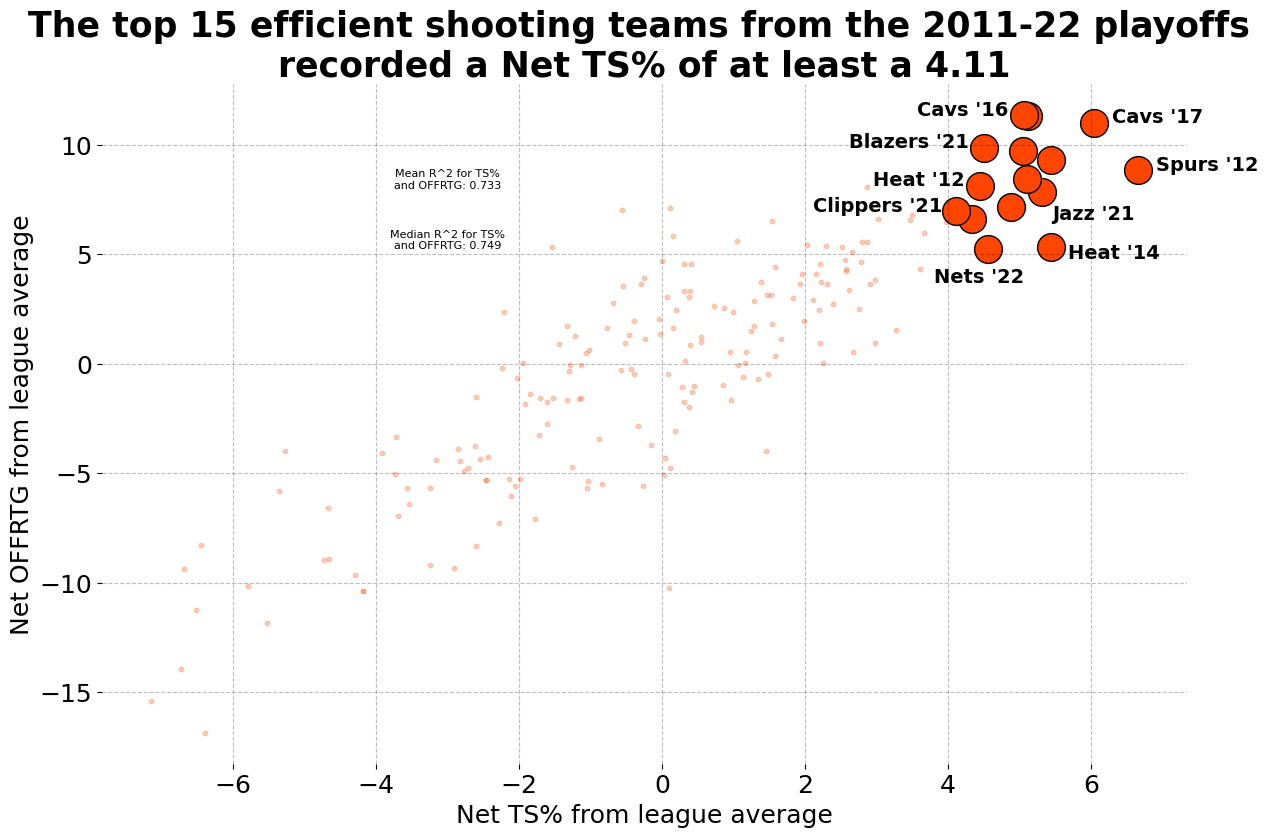

In [590]:
x = 2022
lst = []
for df in teams_11_22:
    variable = df.reset_index()[['TEAM','Net TS% from league average','Net OFFRTG from league average']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1 = df1.set_index('TEAM').sort_values('Net TS% from league average', ascending=False)
df1

names = [list(df1.index)[i] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.11250]
x = [df1.iloc[i,0] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.11250]
y = [df1.iloc[i,1] for i in range(len(df1.index)) if (df1.iloc[i,0])>= 4.11250]

df2 = pd.DataFrame({
    'TEAM': names,
    'X': x,
    'Y': y
})
df2.set_index('TEAM',inplace=True)

CreateScatter(df1, s1=10, alpha1=.25, figsize=(14,9), dpi=100, xlabel='Net TS% from league average', xlabelsize=18,
              xticksize=18, ylabel='Net OFFRTG from league average', ylabelsize=18, yticksize=18, title = 
'''The top 15 efficient shooting teams from the 2011-22 playoffs 
recorded a Net TS% of at least a 4.11''', titlefontsize=25, marker='o', 
              scattercolor='orangered',df2=df2, s2=400
             )

plt.text(-3, 8, 
'''Mean R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of TS% and OFFRTG for Teams'].mean(), 3)),
        ha='center', fontsize=8)
plt.text(-3, 5.25, 
'''Median R^2 for TS%
and OFFRTG: {value}'''.format(value = round(Efficiency2011_2022['R^2 of TS% and OFFRTG for Teams'].median(), 3)),
        ha='center', fontsize=8)

plt.text(6.656250000000007+.25, 8.824999999999989, "Spurs '12", fontsize=14, weight='bold')
plt.text(6.043749999999996+.25, 10.993750000000006, "Cavs '17", fontsize=14, weight='bold')
plt.text(5.437500000000007+.25, 5.3062499999999915-.5, "Heat '14", fontsize=14, weight='bold')
plt.text(5.312500000000007+.15, 7.843750000000014-1.25, "Jazz '21", fontsize=14, weight='bold')
plt.text(5.068749999999994-1.5, 11.34375, "Cavs '16", fontsize=14, weight='bold')
plt.text(4.5562499999999915-.75, 5.212500000000006-1.5, "Nets '22", fontsize=14, weight='bold')
plt.text(4.512500000000003-1.9, 9.843750000000014, "Blazers '21", fontsize=14, weight='bold')
plt.text(4.456250000000011-1.5, 8.124999999999986, "Heat '12", fontsize=14, weight='bold')
plt.text(4.112500000000004-2, 6.943750000000023, "Clippers '21", fontsize=14, weight='bold')

#plt.savefig('top 15 efficient shooting teams from 2011-22 playoffs.pdf', bbox_inches='tight')
plt.show()

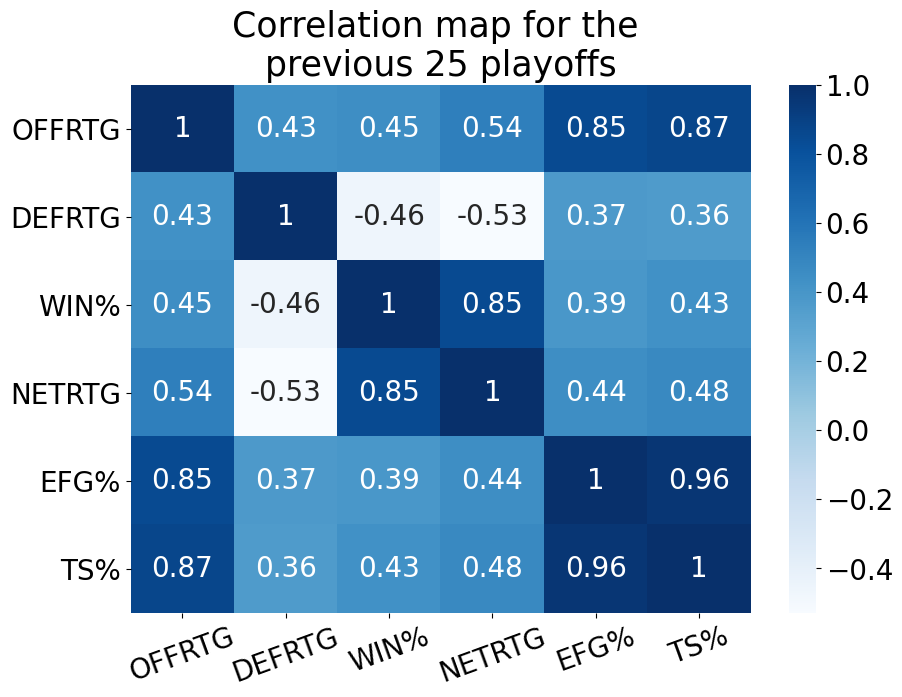

In [603]:
# correlation heat map for past 25 years
x = 2022
lst = []
for df in all_teams:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
previous 25 playoffs''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the previous 25 playoffs.pdf', bbox_inches='tight')
plt.show()

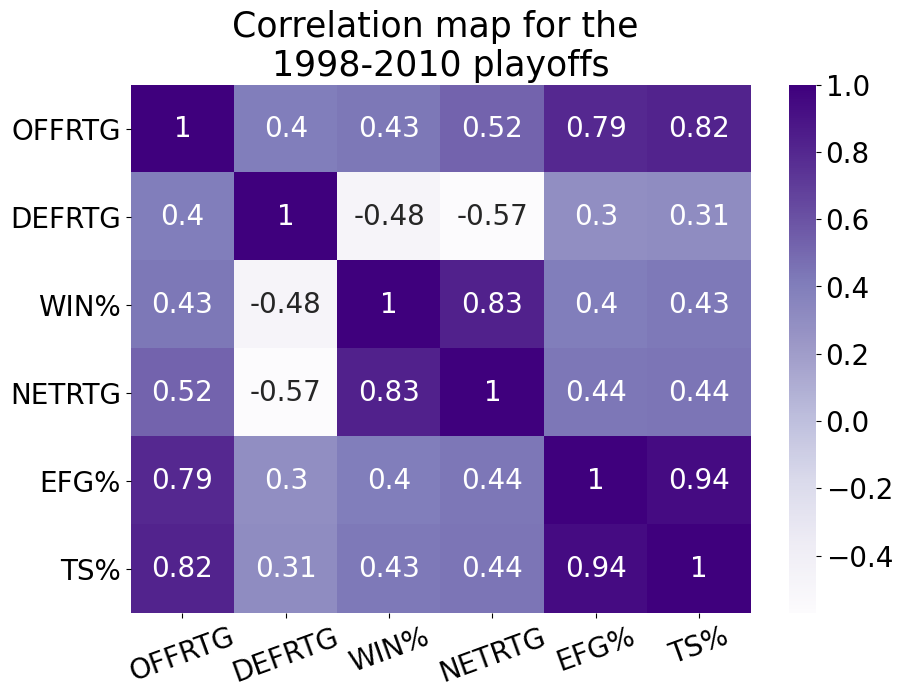

In [605]:
# correlation heat map from 1998-2010 szns
x = 2010
lst = []
for df in teams_98_10:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
1998-2010 playoffs''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Purples", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the 1998-2010 playoffs.pdf', bbox_inches='tight')
plt.show()

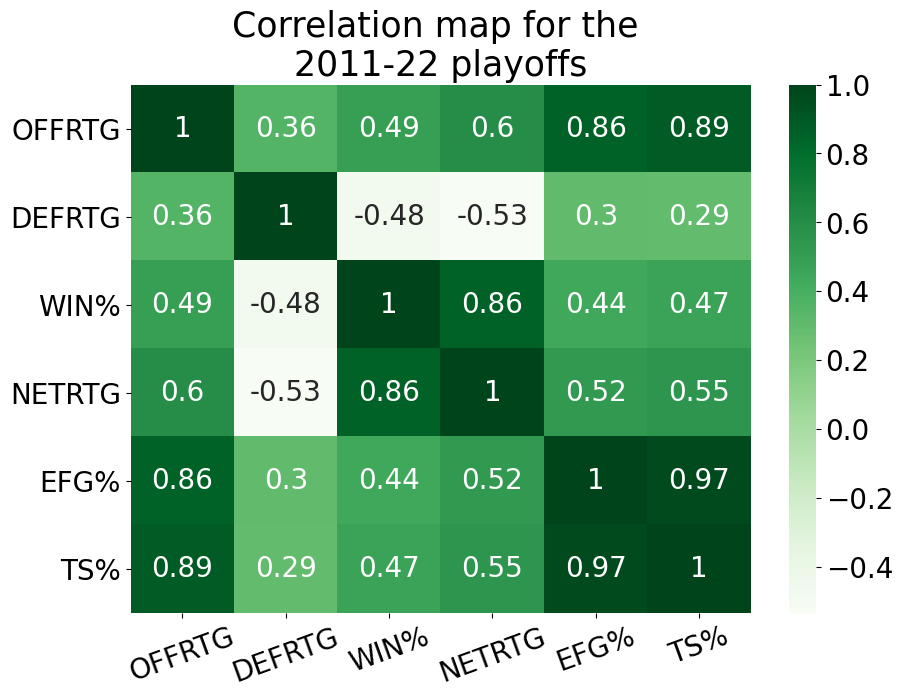

In [608]:
# correlation heat map from 2011-2022 szns
x = 2022
lst = []
for df in teams_11_22:
    df.dropna(inplace=True)
    variable = df.reset_index()[['TEAM','OFFRTG', 'DEFRTG', 'WIN%', 'NETRTG', 'EFG%', 'TS%']]
    variable['TEAM'] = variable['TEAM'] + ' \'' + str(x)[-2:]
    lst.append(variable)
    x -= 1

df1 = reduce(lambda left, right: pd.merge(left, right, how='outer'), lst)
df1.set_index('TEAM', inplace=True)
corr = df1.corr()

plt.figure(figsize=(10,7),dpi=100)
plt.title('''Correlation map for the 
2011-22 playoffs''',ha='center',fontsize=25)
ax = sns.heatmap(corr, cmap="Greens", annot=True, annot_kws={"fontsize":20})
cbar = ax.collections[0].colorbar

cbar.ax.tick_params(labelsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=20, fontsize=20)

#plt.savefig('Correlation map for the 2011-2022 playoffs.pdf', bbox_inches='tight')
plt.show()

In [81]:
# write all dataframes into excel
#with pd.ExcelWriter('nbaPlayoffs_TeamStatsMerged.xlsx') as writer:
#    playoff_efficiency.to_excel(writer, sheet_name='Playoffs R2 Efficiency and Win%')
#    df_playoffteams21.to_excel(writer, sheet_name='2021-22', index=True)
#    df_playoffteams20.to_excel(writer, sheet_name='2020-21', index=True)
#    df_playoffteams19.to_excel(writer, sheet_name='2019-20', index=True)
#    df_playoffteams18.to_excel(writer, sheet_name='2018-19', index=True)
#    df_playoffteams17.to_excel(writer, sheet_name='2017-18', index=True)
#    df_playoffteams16.to_excel(writer, sheet_name='2016-17', index=True)
#    df_playoffteams15.to_excel(writer, sheet_name='2015-16', index=True)
#    df_playoffteams14.to_excel(writer, sheet_name='2014-15', index=True)
#    df_playoffteams13.to_excel(writer, sheet_name='2013-14', index=True)
#    df_playoffteams12.to_excel(writer, sheet_name='2012-13', index=True)
#    df_playoffteams11.to_excel(writer, sheet_name='2011-12', index=True)
#    df_playoffteams10.to_excel(writer, sheet_name='2010-11', index=True)
#    df_playoffteams09.to_excel(writer, sheet_name='2009-10', index=True)
#    df_playoffteams08.to_excel(writer, sheet_name='2008-09', index=True)
#    df_playoffteams07.to_excel(writer, sheet_name='2007-08', index=True)
#    df_playoffteams06.to_excel(writer, sheet_name='2006-07', index=True)
#    df_playoffteams05.to_excel(writer, sheet_name='2005-06', index=True)
#    df_playoffteams04.to_excel(writer, sheet_name='2004-05', index=True)
#    df_playoffteams03.to_excel(writer, sheet_name='2003-04', index=True)
#    df_playoffteams02.to_excel(writer, sheet_name='2002-03', index=True)
#    df_playoffteams01.to_excel(writer, sheet_name='2001-02', index=True)
#    df_playoffteams00.to_excel(writer, sheet_name='2000-01', index=True)
#    df_playoffteams99.to_excel(writer, sheet_name='1999-00', index=True)
#    df_playoffteams98.to_excel(writer, sheet_name='1998-99', index=True)
#    df_playoffteams97.to_excel(writer, sheet_name='1997-98', index=True)